# Project Title Here

**Names**: Jialong Li


## 1. Introduction and Dataset Research

Under the influence of the globalization movement, we no longer live in only one place for a long time, but in a global “space of flows” (Doel et al., 2002). As the transportation hub of this fluid space, the importance of the city reaches an unprecedented level. Large cities are not only the centers of economic, political, and artistic activities, but also the concentrated expression of culture and lifestyle.

However, the question of how to choose the right city has always been a problem. The company MoveHub attempts to score cities with factors that people may care about, such as environment, safety, living costs, climate, etc., to guide people to choose livable cities (Movehub City Rankings, 2017). Nevertheless, the definition of livability varies not only from space to person but also from person to person (Ruth & Franklin, 2014), and such studies ignore the influence of human factors. In reality, individuals usually cannot obtain complete information, and their judgments largely rely on their own experiences. For example, suppose there is a banker who intends to move to the US for work. If he or she is from a metropolis like Hong Kong, or London, he or she is more likely to be in New York than somewhere with a more profitable overall rating. And owners of manufacturing factories will choose the most affordable cities to replicate their achievements in the past.

In view of this, cluster analysis based on unsupervised learning may be a good solution to the problem. Clustering algorithms can transform data into knowledge, help researchers conduct further exploratory data analysis (Luxburg et al., 2012), and sort out similar urban clusters. Therefore, I will run a Hierarchical clustering and fuzzy c-means algorithm based on “Movehub data” (Kaggle, 2022) for reference by relevant decision-makers.

## 2. Data Cleaning and Data Manipulation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler

from pyclustertend import hopkins

from sklearn.manifold import TSNE

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

from scipy.spatial.distance import pdist, squareform

from skfuzzy.cluster import cmeans

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('movehub_data_cleaned.csv')
df

City        Country  Cappuccino  Cinema   Wine  Gasoline  \
0       Lausanne    Switzerland        3.15   12.59   8.40      1.32   
1         Geneva    Switzerland        2.80   12.94  10.49      1.28   
2          Basel    Switzerland        3.50   11.89   7.35      1.25   
3          Perth      Australia        2.87   11.43  10.08      0.97   
4      Nashville  United States        3.84   12.00  13.50      0.65   
..           ...            ...         ...     ...    ...       ...   
180        Cairo          Egypt        1.42    3.27   7.33      0.19   
181      Karachi       Pakistan        1.00    3.27   5.11      0.67   
182       Lahore       Pakistan        1.23    3.27   6.54      0.66   
183  Addis Ababa       Ethiopia        0.46    2.29   4.18      0.72   
184       Indore          India        0.91    2.23   6.03      0.84   

     Avg Rent  Avg Disposable Income  Movehub Rating  Purchase Power  \
0     1714.00                4266.11           87.21           90.77   
1     2607.95                3917.72           83.27           61.22   
2     1649.29                3847.76           84.20           78.17   
3     2083.14                3358.55           95.38           62.11   
4     2257.14                3089.75           80.61           80.30   
..        ...                    ...             ...             ...   
180    425.85                 163.44           67.93           11.90   
181    197.78                 139.60           67.81           14.63   
182    206.08                 132.95           67.32           12.45   
183    653.77                 124.22           59.88            6.38   
184    205.15                 120.68           76.38           35.79   

     Health Care  Pollution  Quality of Life  Crime Rating  
0          65.85      87.62            73.21         35.55  
1          74.88      29.43            82.76         54.36  
2          79.74      59.18            88.27         28.12  
3          80.56      23.53            74.62         50.01  
4          60.30       0.00            80.50         25.50  
..           ...        ...              ...           ...  
180        56.48      86.16            17.25         48.81  
181        51.57      69.63            18.50         74.36  
182        48.94      30.55            28.52         51.98  
183        63.89      85.59            28.41         26.04  
184        31.34      59.42            48.53         16.93  

[185 rows x 14 columns]

In [3]:
# No null data
df.isnull().values.any()

False

In [4]:
# no duplicated
any(df["City"].value_counts()>1)

False

In [5]:
# outlier is already removed
df[df['City'] == 'Riyadh']

Empty DataFrame
Columns: [City, Country, Cappuccino, Cinema, Wine, Gasoline, Avg Rent, Avg Disposable Income, Movehub Rating, Purchase Power, Health Care, Pollution, Quality of Life, Crime Rating]
Index: []

The dataset has been cleaned before I imported it. Therefore, there are no nulls and duplicated data in the dataset, and no data cleaning and data manipulation is required.

## 3. Basic Descriptive Analytics

In [6]:
df.head()

City        Country  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
0   Lausanne    Switzerland        3.15   12.59   8.40      1.32   1714.00   
1     Geneva    Switzerland        2.80   12.94  10.49      1.28   2607.95   
2      Basel    Switzerland        3.50   11.89   7.35      1.25   1649.29   
3      Perth      Australia        2.87   11.43  10.08      0.97   2083.14   
4  Nashville  United States        3.84   12.00  13.50      0.65   2257.14   

   Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
0                4266.11           87.21           90.77        65.85   
1                3917.72           83.27           61.22        74.88   
2                3847.76           84.20           78.17        79.74   
3                3358.55           95.38           62.11        80.56   
4                3089.75           80.61           80.30        60.30   

   Pollution  Quality of Life  Crime Rating  
0      87.62            73.21         35.55  
1      29.43            82.76         54.36  
2      59.18            88.27         28.12  
3      23.53            74.62         50.01  
4       0.00            80.50         25.50

In [7]:
# numerical attributes

In [8]:
X = df.copy()
X = X.drop(['City', 'Country'], axis=1)
X.head()

Cappuccino  Cinema   Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0        3.15   12.59   8.40      1.32   1714.00                4266.11   
1        2.80   12.94  10.49      1.28   2607.95                3917.72   
2        3.50   11.89   7.35      1.25   1649.29                3847.76   
3        2.87   11.43  10.08      0.97   2083.14                3358.55   
4        3.84   12.00  13.50      0.65   2257.14                3089.75   

   Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0           87.21           90.77        65.85      87.62            73.21   
1           83.27           61.22        74.88      29.43            82.76   
2           84.20           78.17        79.74      59.18            88.27   
3           95.38           62.11        80.56      23.53            74.62   
4           80.61           80.30        60.30       0.00            80.50   

   Crime Rating  
0         35.55  
1         54.36  
2         28.12  
3         50.01  
4         25.50

In [9]:
# basic summary statistics
df.describe() 

Cappuccino      Cinema        Wine    Gasoline     Avg Rent  \
count  185.000000  185.000000  185.000000  185.000000   185.000000   
mean     1.978216    6.461351    7.040703    1.013838  1100.064811   
std      0.762252    2.736618    3.378529    0.349151   676.618422   
min      0.460000    1.810000    2.130000    0.070000   120.680000   
25%      1.310000    4.260000    4.260000    0.780000   618.050000   
50%      2.090000    6.820000    6.340000    0.990000   980.650000   
75%      2.490000    7.970000    8.400000    1.330000  1432.980000   
max      4.480000   14.950000   26.150000    1.680000  5052.310000   

       Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
count             185.000000      185.000000       185.00000   185.000000   
mean             1393.807297       79.612108        45.57973    65.992000   
std               911.383515        6.658616        20.37569    14.943033   
min               120.680000       59.880000         6.38000    20.830000   
25%               527.890000       75.070000        28.82000    58.900000   
50%              1494.670000       80.680000        47.98000    67.590000   
75%              2045.960000       84.080000        60.36000    77.290000   
max              4266.110000      100.000000        91.85000    95.960000   

        Pollution  Quality of Life  Crime Rating  
count  185.000000       185.000000    185.000000  
mean    45.904919        59.038811     41.613135  
std     25.968225        22.153796     16.278047  
min      0.000000         5.290000     10.860000  
25%     23.530000        42.450000     29.530000  
50%     37.210000        62.820000     41.370000  
75%     68.210000        78.060000     51.030000  
max     92.420000        93.050000     85.700000

In [10]:
# categorical attributes

In [11]:
df['City'].value_counts()

Indore          1
Houston         1
Valencia        1
Darwin          1
Rome            1
               ..
Boston          1
Quito           1
Warsaw          1
Berlin          1
Christchurch    1
Name: City, Length: 185, dtype: int64

In [12]:
df['Country'].value_counts()

United States     19
United Kingdom    15
India             13
Australia          8
Canada             8
                  ..
Colombia           1
Chile              1
Indonesia          1
Bahrain            1
Croatia            1
Name: Country, Length: 79, dtype: int64

In [13]:
# categorical attributes "City" - number of observations
len(df['City'].unique())

185

In [14]:
# categorical attributes "Country" - number of observations
len(df['Country'].unique())

79

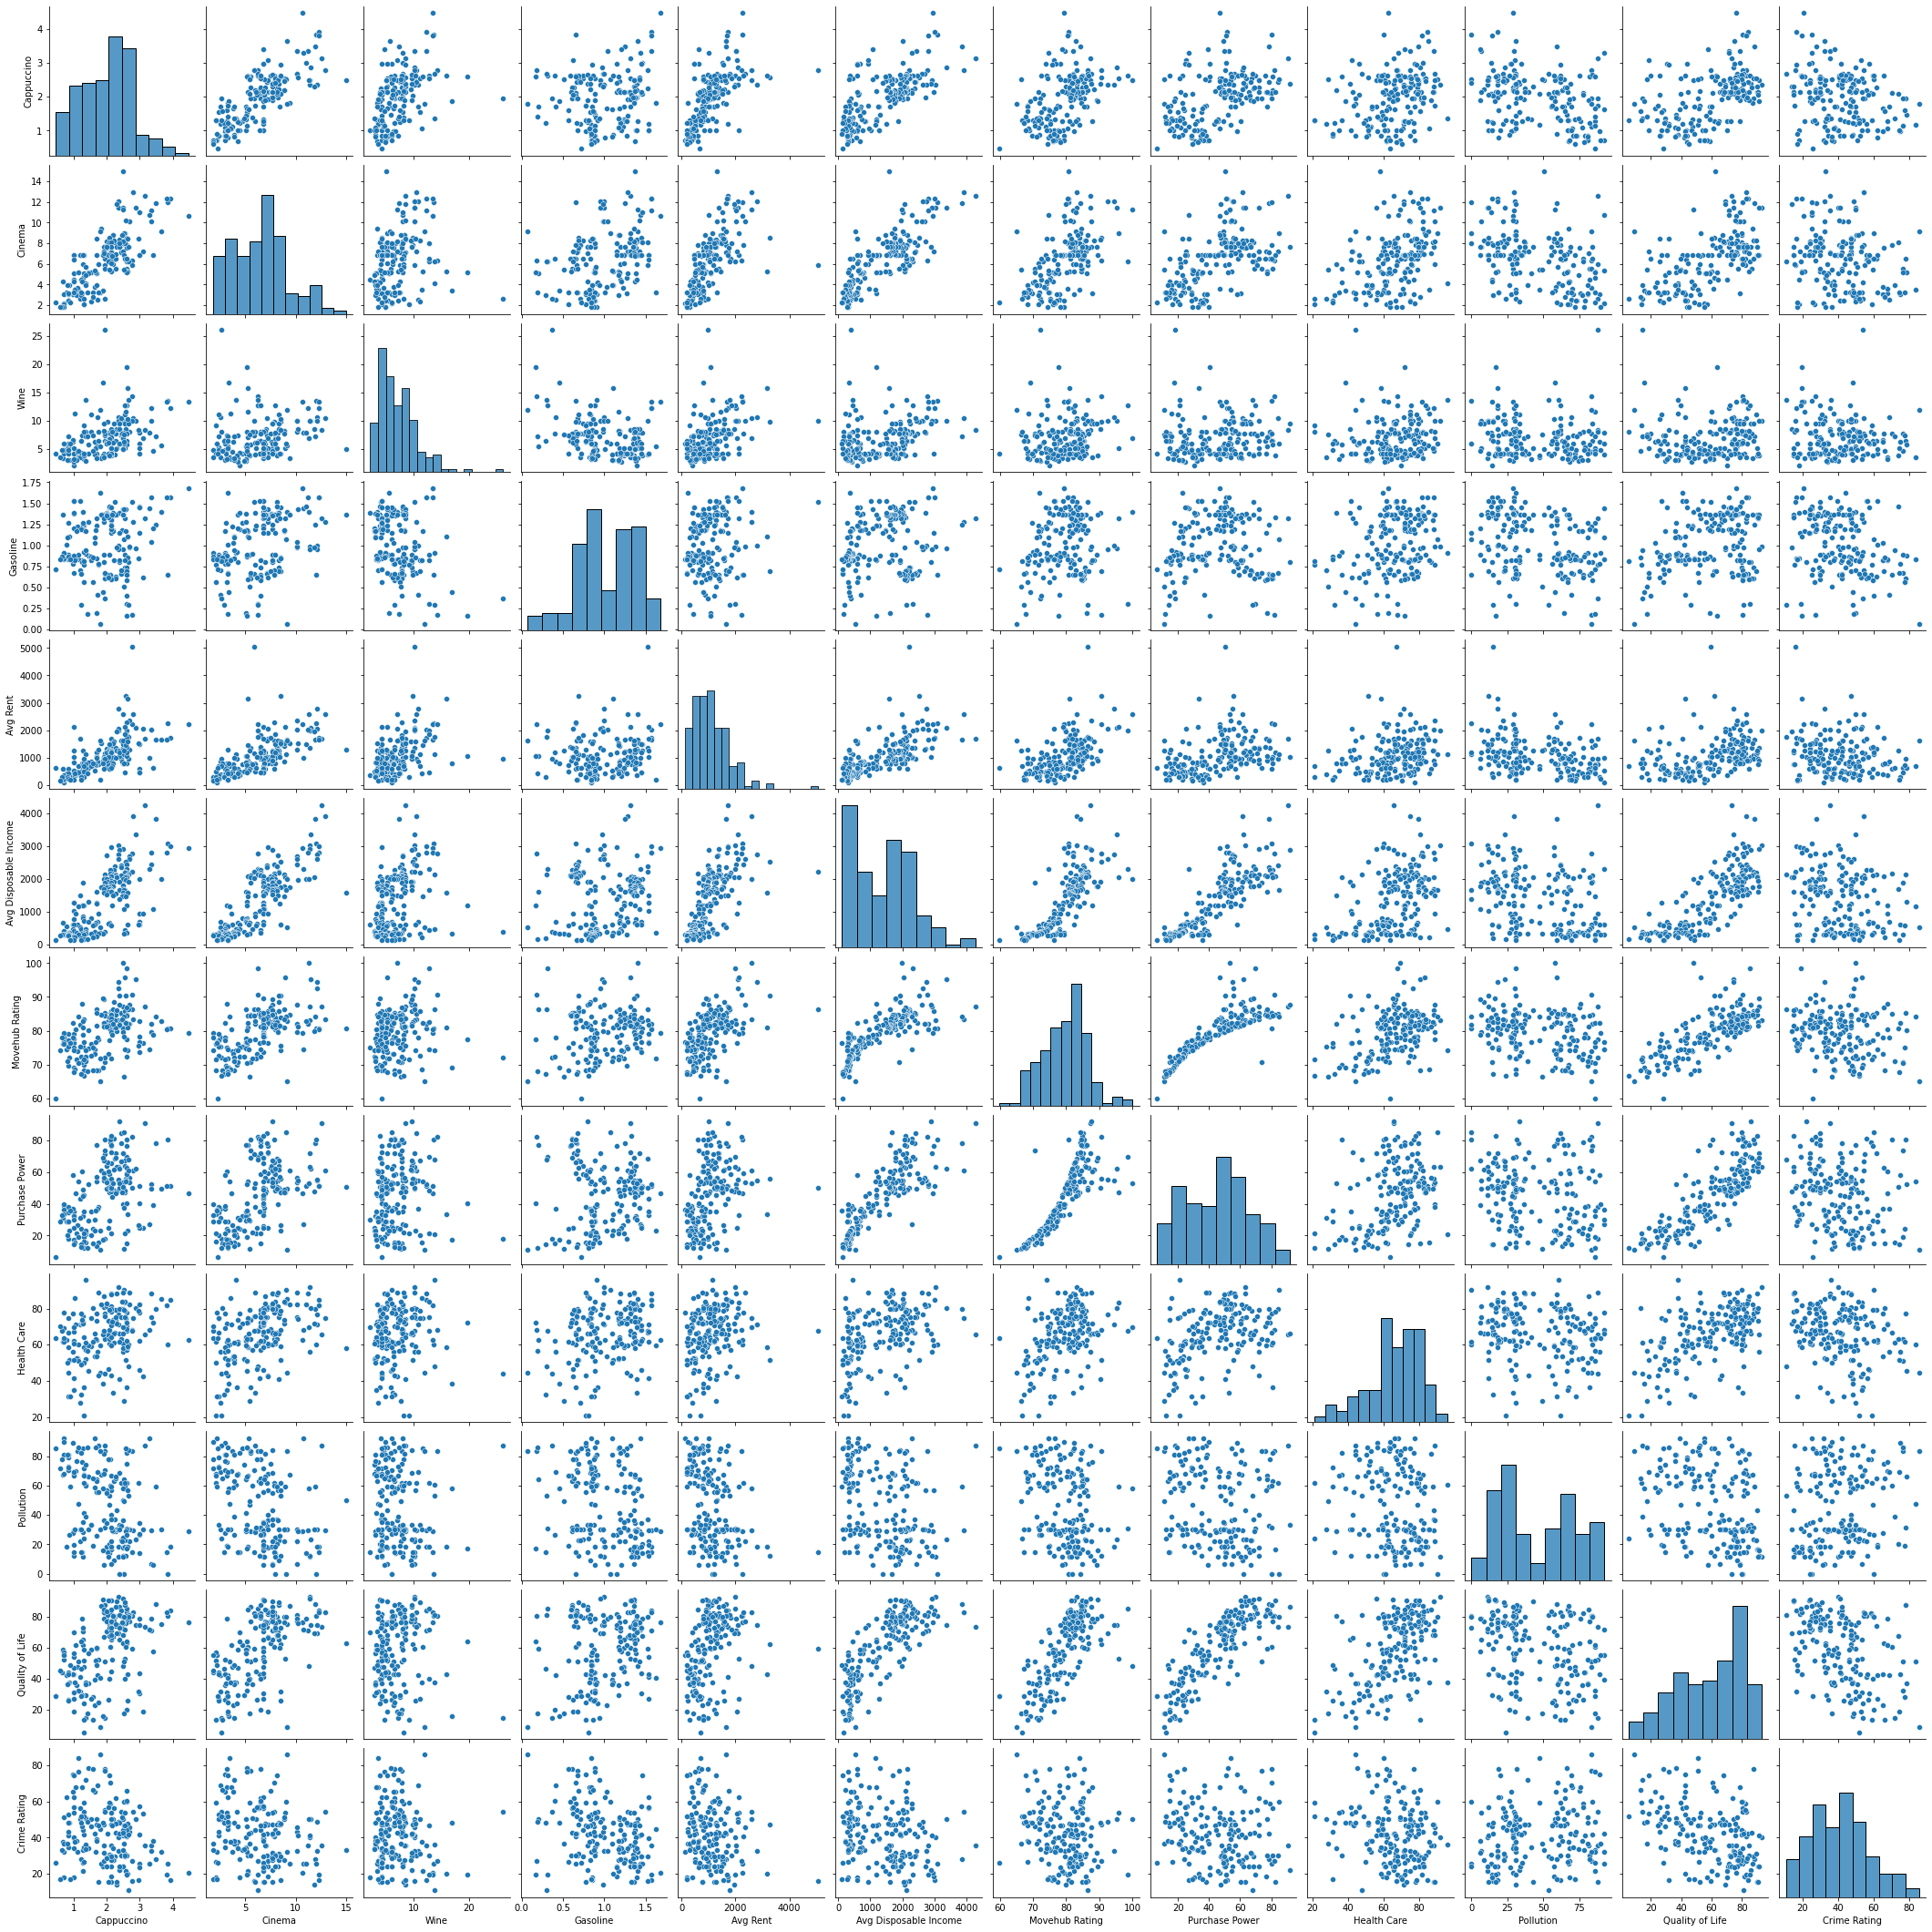

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
# Outliers: Obviously in the right part of Avg Rent and Wine attribute.
# Nearly independent variables: wine, gos, pollution, crime
# Correlated variables: {quality of life: income, purchase power, health care matters}

## 4. Dataset Scaling Decisions

It can be seen that the mean of "Avg Disposable Income" is 1394, while the mean of "Gasoline" is only 1.01. To keep all attribution in the same position, I need to scale the data to make their balance.

In [17]:
X.mean() 
# unscaled

Cappuccino                  1.978216
Cinema                      6.461351
Wine                        7.040703
Gasoline                    1.013838
Avg Rent                 1100.064811
Avg Disposable Income    1393.807297
Movehub Rating             79.612108
Purchase Power             45.579730
Health Care                65.992000
Pollution                  45.904919
Quality of Life            59.038811
Crime Rating               41.613135
dtype: float64

In [18]:
X_stand = StandardScaler().fit_transform(X)
X_stand

array([[ 1.54143774,  2.24557433,  0.40342591, ...,  1.61074863,
         0.64140908, -0.37348391],
       [ 1.08102583,  2.37381647,  1.02371711, ..., -0.63614771,
         1.07365626,  0.78519592],
       [ 2.00184965,  1.98909005,  0.09179636, ...,  0.51259204,
         1.32304705, -0.83116552],
       ...,
       [-0.98425045, -1.16933065, -0.14860358, ..., -0.59290103,
        -1.38132672,  0.63858996],
       [-1.99715665, -1.52840864, -0.84902809, ...,  1.53236404,
        -1.38630548, -0.95929173],
       [-1.40519848, -1.550393  , -0.2999665 , ...,  0.52185919,
        -0.47564439, -1.5204599 ]])

In [19]:
pd.DataFrame(X_stand).mean()

0     2.304463e-16
1     7.681543e-17
2     0.000000e+00
3    -9.601929e-17
4     1.536309e-16
5     0.000000e+00
6     7.681543e-16
7     7.681543e-17
8    -3.456694e-16
9     9.601929e-17
10   -3.072617e-16
11   -1.728347e-16
dtype: float64

In [20]:
X=pd.DataFrame(X_stand, columns=X.columns)
X.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0    1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
1    1.081026  2.373816  1.023717  0.764381  2.234608               2.776835   
2    2.001850  1.989090  0.091796  0.678225  0.813923               2.699865   
3    1.173108  1.820543  0.902033 -0.125896  1.456867               2.161631   
4    2.449107  2.029395  1.917055 -1.044892  1.714726               1.865894   

   Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0        1.144158        2.223871    -0.009529   1.610749         0.641409   
1        0.550838        0.769678     0.596406  -0.636148         1.073656   
2        0.690886        1.603809     0.922524   0.512592         1.323047   
3        2.374470        0.813476     0.977548  -0.863965         0.705228   
4        0.150271        1.708629    -0.381947  -1.772531         0.971365   

   Crime Rating  
0     -0.373484  
1      0.785196  
2     -0.831166  
3      0.517240  
4     -0.992555

In [21]:
df_stand=X.copy()
df_stand['Country']=df['Country']
df_stand.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0    1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
1    1.081026  2.373816  1.023717  0.764381  2.234608               2.776835   
2    2.001850  1.989090  0.091796  0.678225  0.813923               2.699865   
3    1.173108  1.820543  0.902033 -0.125896  1.456867               2.161631   
4    2.449107  2.029395  1.917055 -1.044892  1.714726               1.865894   

   Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0        1.144158        2.223871    -0.009529   1.610749         0.641409   
1        0.550838        0.769678     0.596406  -0.636148         1.073656   
2        0.690886        1.603809     0.922524   0.512592         1.323047   
3        2.374470        0.813476     0.977548  -0.863965         0.705228   
4        0.150271        1.708629    -0.381947  -1.772531         0.971365   

   Crime Rating        Country  
0     -0.373484    Switzerland  
1      0.785196    Switzerland  
2     -0.831166    Switzerland  
3      0.517240      Australia  
4     -0.992555  United States

## 5. Clusterability and Clustering Structure Questions

In [22]:
# 5.1 hopkin's statistics

In [23]:
n=len(X)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(X)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)
# These hopkin's statistics are closer to 0.25, which indicates there are maybe an underlying clustering relationship, but not very well.

[0.2730385892233059, 0.23439081325065367, 0.2636463994173726, 0.24042976525434287, 0.24102328272837287]


In [24]:
# 5.2 t-SNE

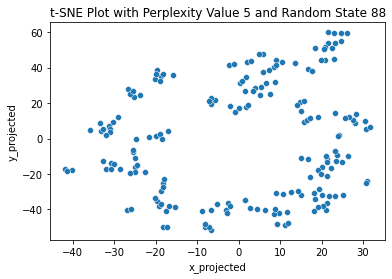

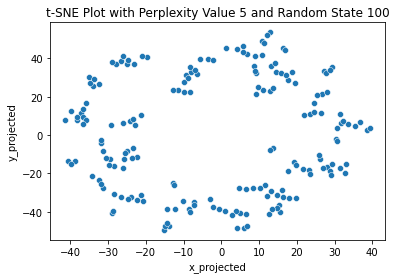

--------------------------------------------


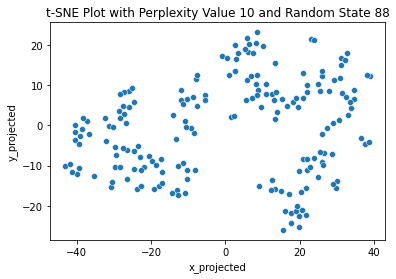

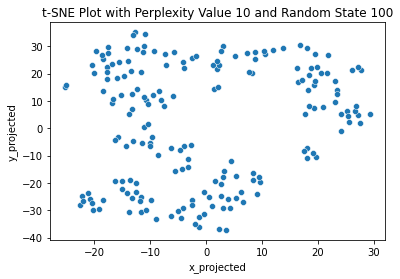

--------------------------------------------


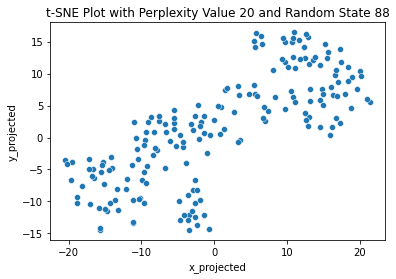

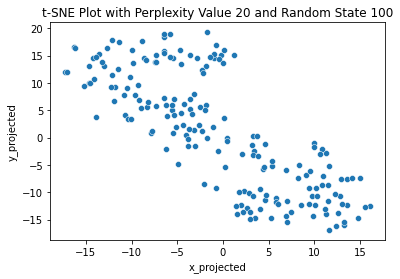

--------------------------------------------


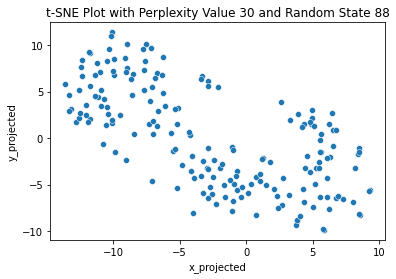

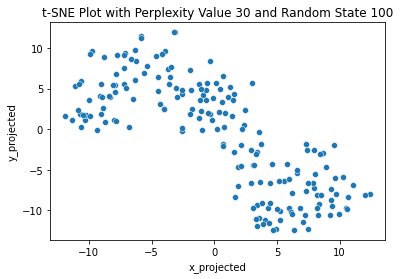

--------------------------------------------


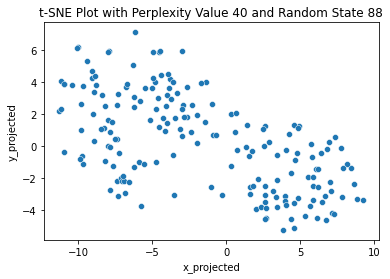

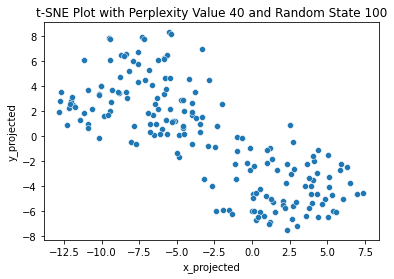

--------------------------------------------


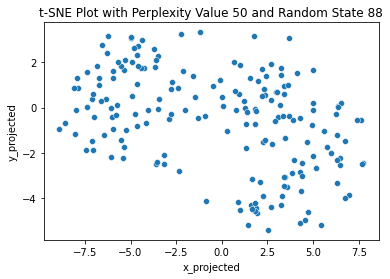

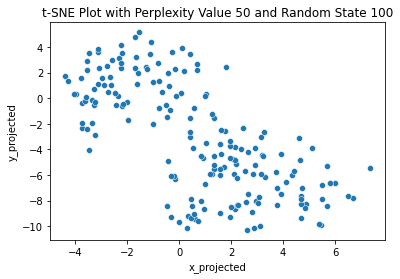

--------------------------------------------


In [25]:
import warnings
warnings.filterwarnings("ignore")

for perp in [5,10, 20, 30, 40, 50]:
    for rs in [88,100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

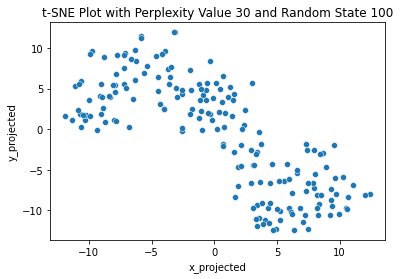

--------------------------------------------


In [26]:
import warnings
warnings.filterwarnings("ignore")

for perp in [30]:
    for rs in [100]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

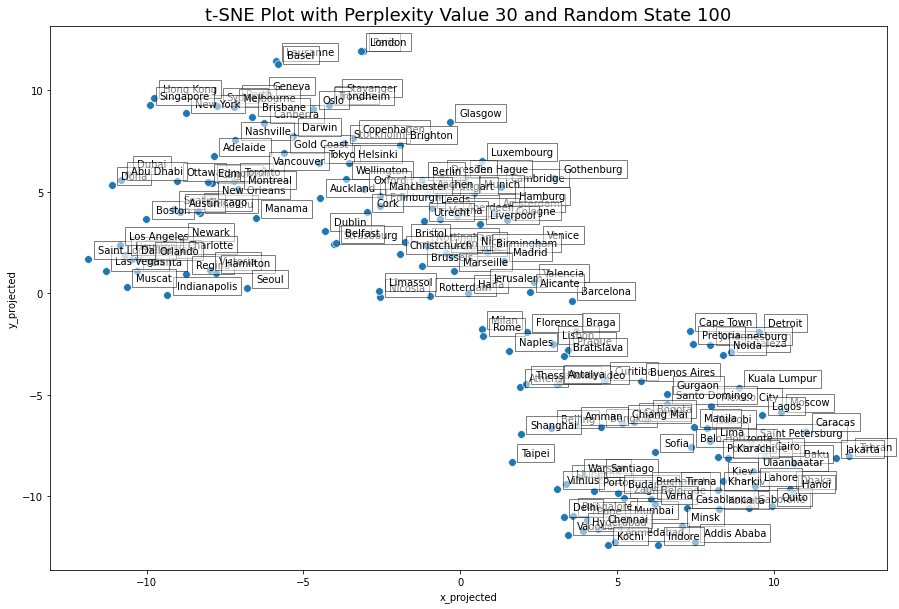

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='x_projected',y='y_projected', data=df_combo, s=60)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 100), fontsize=18)

for i in range(df_combo.shape[0]):
    plt.text(x=df_combo.x_projected[i]+0.3,y=df_combo.y_projected[i]+0.3,s=df_combo.City[i], 
          fontdict=dict(color='black',size=10),
          bbox=dict(facecolor='white',alpha=0.5))

plt.show()

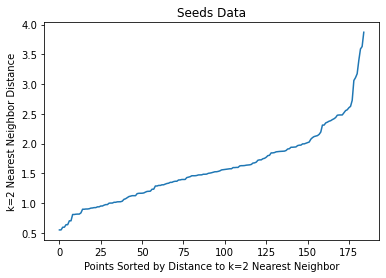

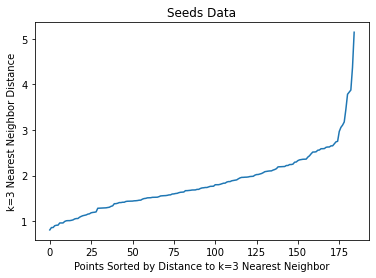

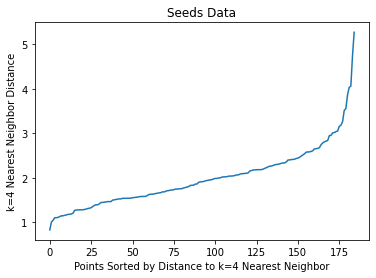

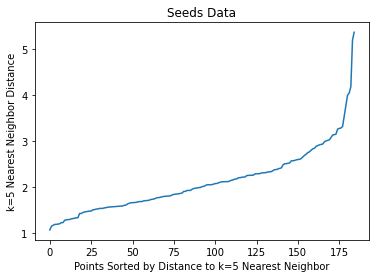

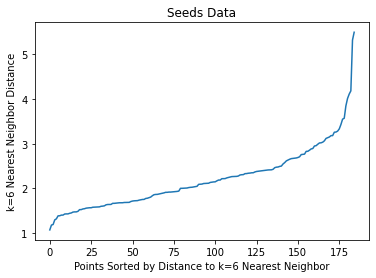

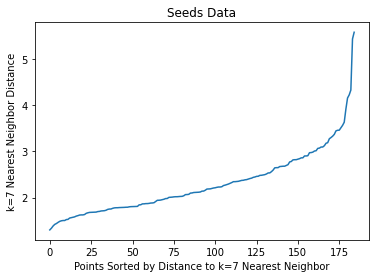

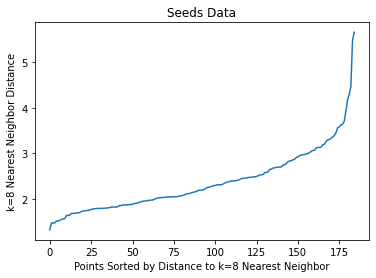

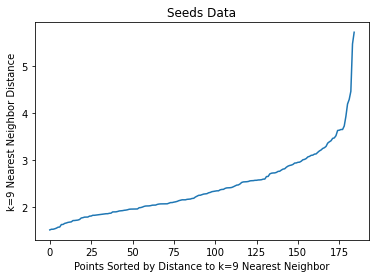

In [28]:
#Find the distance of the kth nearest neighbor
for k in range(2,10):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    plt.plot(np.sort(distances.T[k-1]))
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Seeds Data')
    plt.show()

**Hopkin's statistics**  
The hopkin's statistics are closer to 0.25, which indicates there are maybe an underlying clustering relationship, but not very well.

**t-SNE plot**

We don't see any strong clustering structure in the t-SNE plots with perplexity values of 5, we do see some evidence of a weak (potentially overlapping) clustering structure with perplexity values 10, 20, and 30.

In the plots with perplexity values of 10, 20, and 30, we see that there may exist 2 or 3 overlapping clusters that are somewhat spherical in shape. 

**DBSCAN**
The curve starts to slope significantly at x=175, indicating that there should be about 10 outliers in the data set.

## 6. Algorithm Selection Motivation

Based on the result of EDA research and the t-SNE plot. We already know many outliers are occurring in the dataset and the clusters are highly overlapping. Therefore, I'm going to use Hierarchical Clustering and Fuzzy c-Means algorithm that is good to deal with overlapping data.

**Hierarchical Clustering**  
Since we already know the outlier exists (just not which row), complete linkage and average linkage should give us better results. Before clustering analysis, we can use single linkage to find some outliers.

**Fuzzy c-Means algorithm**

Fuzzy c-Means algorithm is able to identify the underlying clusters in the dataset,reflecting the uncertain nature of which clusters "straddle nodes" should belong to, and good to reflect the more certain nature of which cluster highly cohesive objects belong to.

## 7. Clustering Algorithm 1 (change name to the algorithm you chose)



### 7.1. Parameter Selection

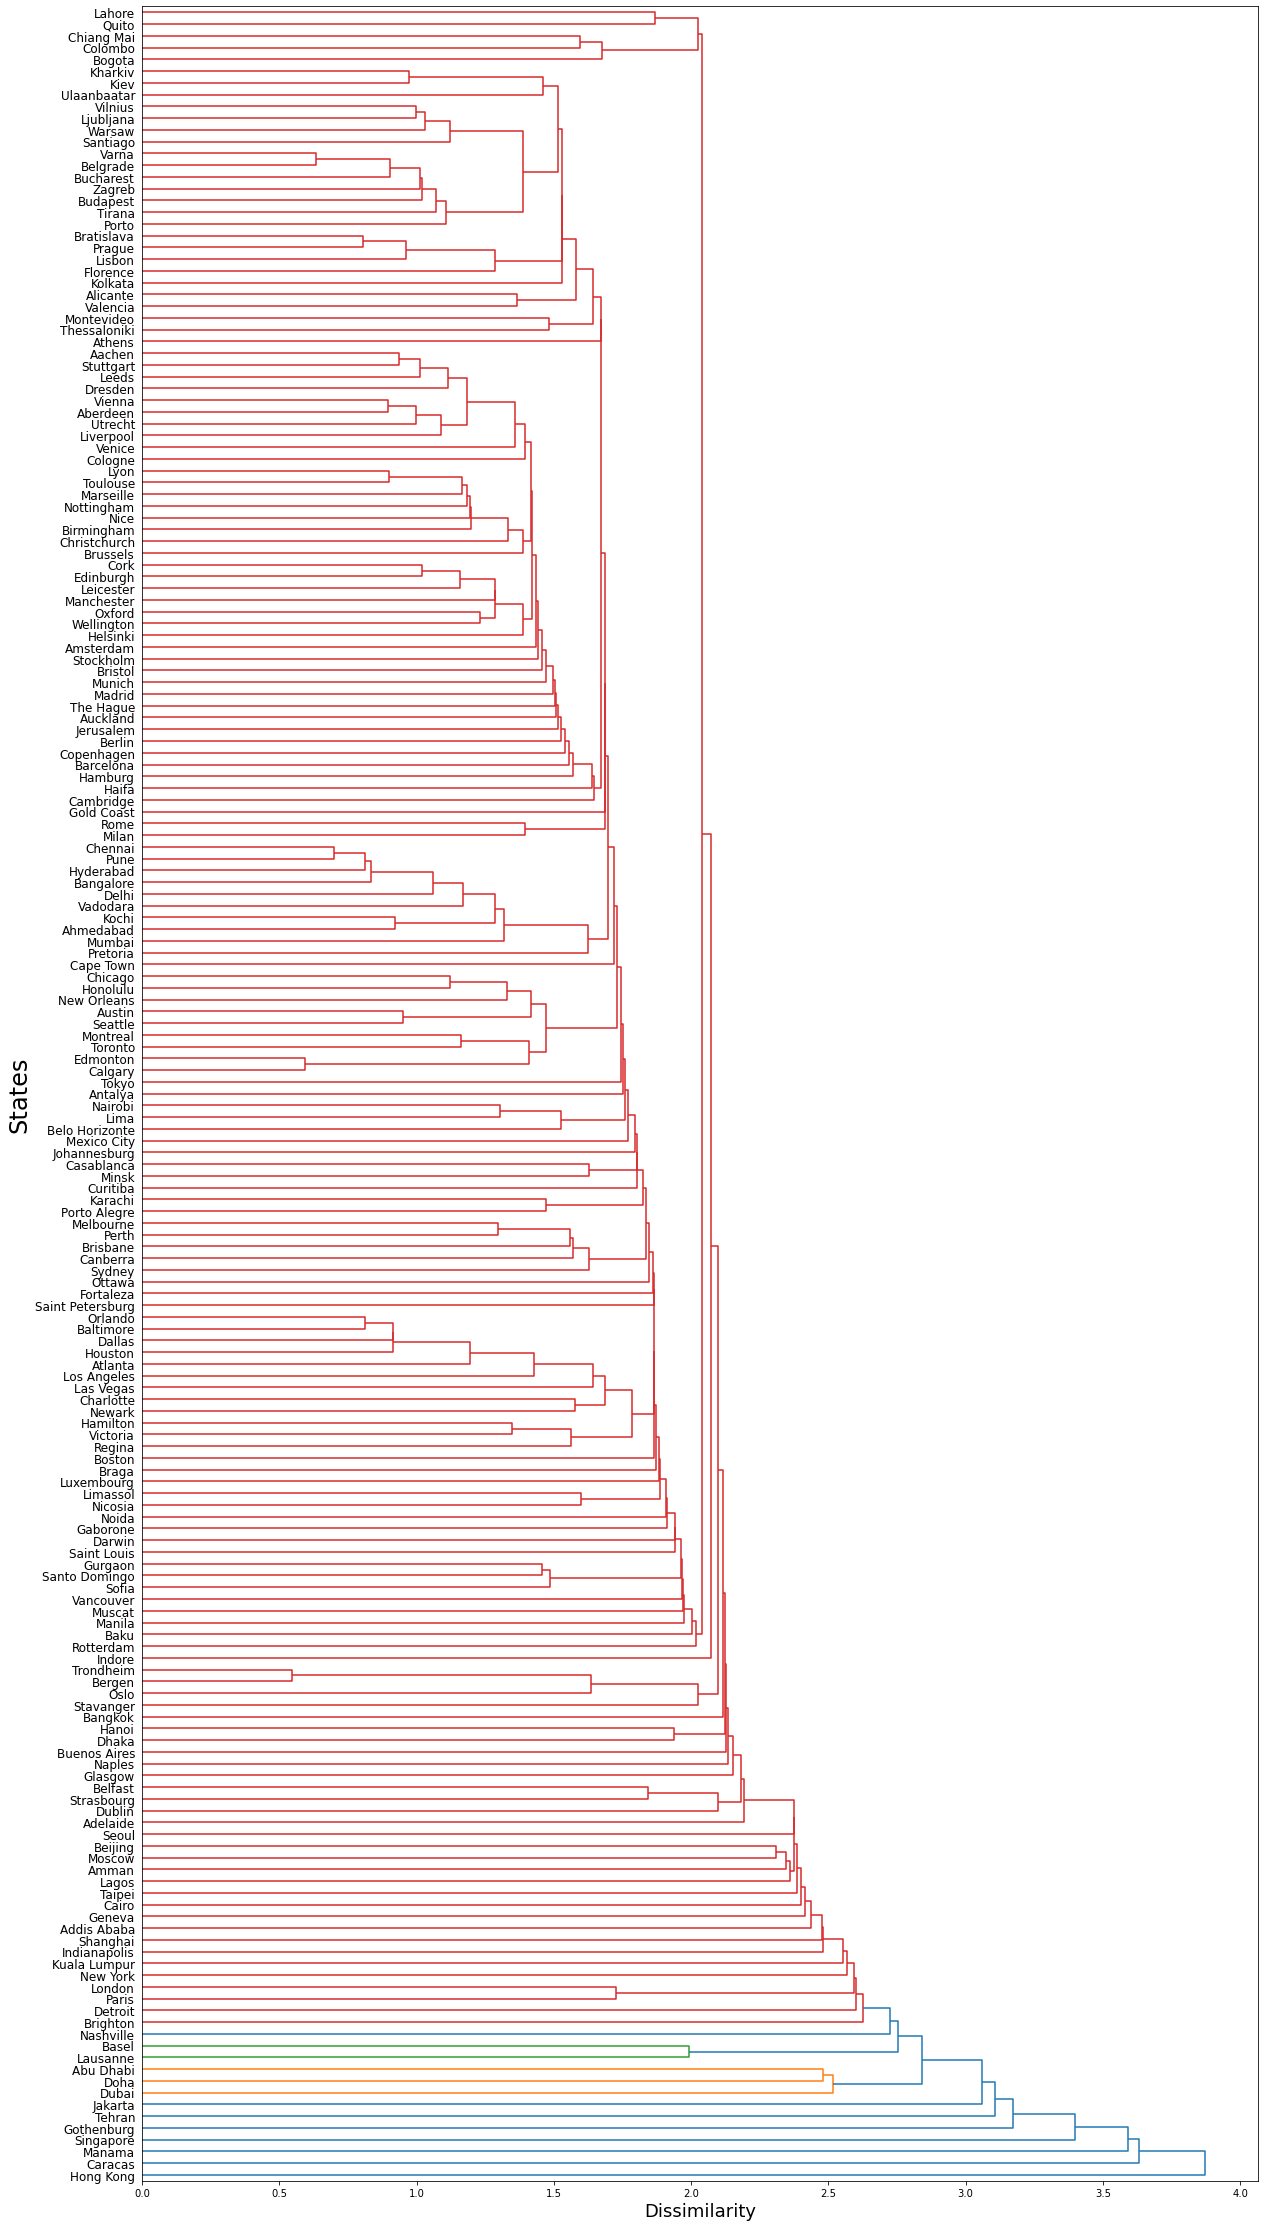

In [29]:
# find outliers
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(20, 40))
d = dendrogram(Z, orientation='right', labels=df['City'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('States', fontsize=24)
plt.yticks(fontsize=12)
plt.show()

In [30]:
# Hong Kong is one of the outliers

In [31]:
df.loc[df['Avg Rent'] >3000]
# Avg Rent extrely high

City        Country  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
19   New York  United States        2.58    8.50   9.81      0.69   3268.84   
30  Hong Kong      Hong Kong        2.78    5.89  10.10      1.52   5052.31   
88  Singapore      Singapore        2.64    5.27  15.82      1.11   3164.42   

    Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
19                2530.09           90.53           55.56        51.39   
30                2210.39           86.37           50.07        67.59   
88                1582.21           81.07           33.14        58.82   

    Pollution  Quality of Life  Crime Rating  
19      12.01            61.94         47.33  
30      14.88            59.50         16.31  
88      18.48            42.65         19.96

Highest Average Silhouette Score: 0.30124348638682524


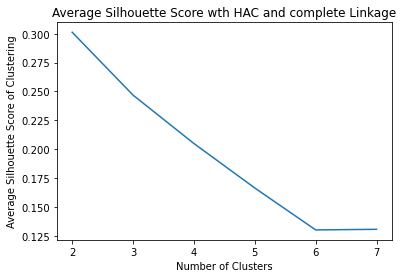

Highest Average Silhouette Score: 0.32144774128409453


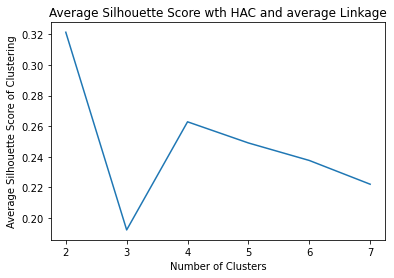

In [32]:
# single and wald dropped --- too sensitive to outliers.
for link in ['complete', 'average']:
    avg_ss=[]
    for k in range(2,8):
        #First, designate the HAC linkage function, and the number of clusters you want to extract from the resulting dendrogram
        hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=link)
        Y_pred = hac.fit_predict(X)
        avg_ss.append(silhouette_score(X, Y_pred))
    
    print('Highest Average Silhouette Score:', np.max(avg_ss))
    plt.plot(range(2,8), avg_ss)
    plt.title('Average Silhouette Score wth HAC and %s Linkage'%link)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score of Clustering')
    plt.show()
    

## complete linkage and average linkage are tend to be more robust to outliers.
## k = 2, and HAC with average linkage gives us the better performance.

### 7.2. Clustering Algorithm

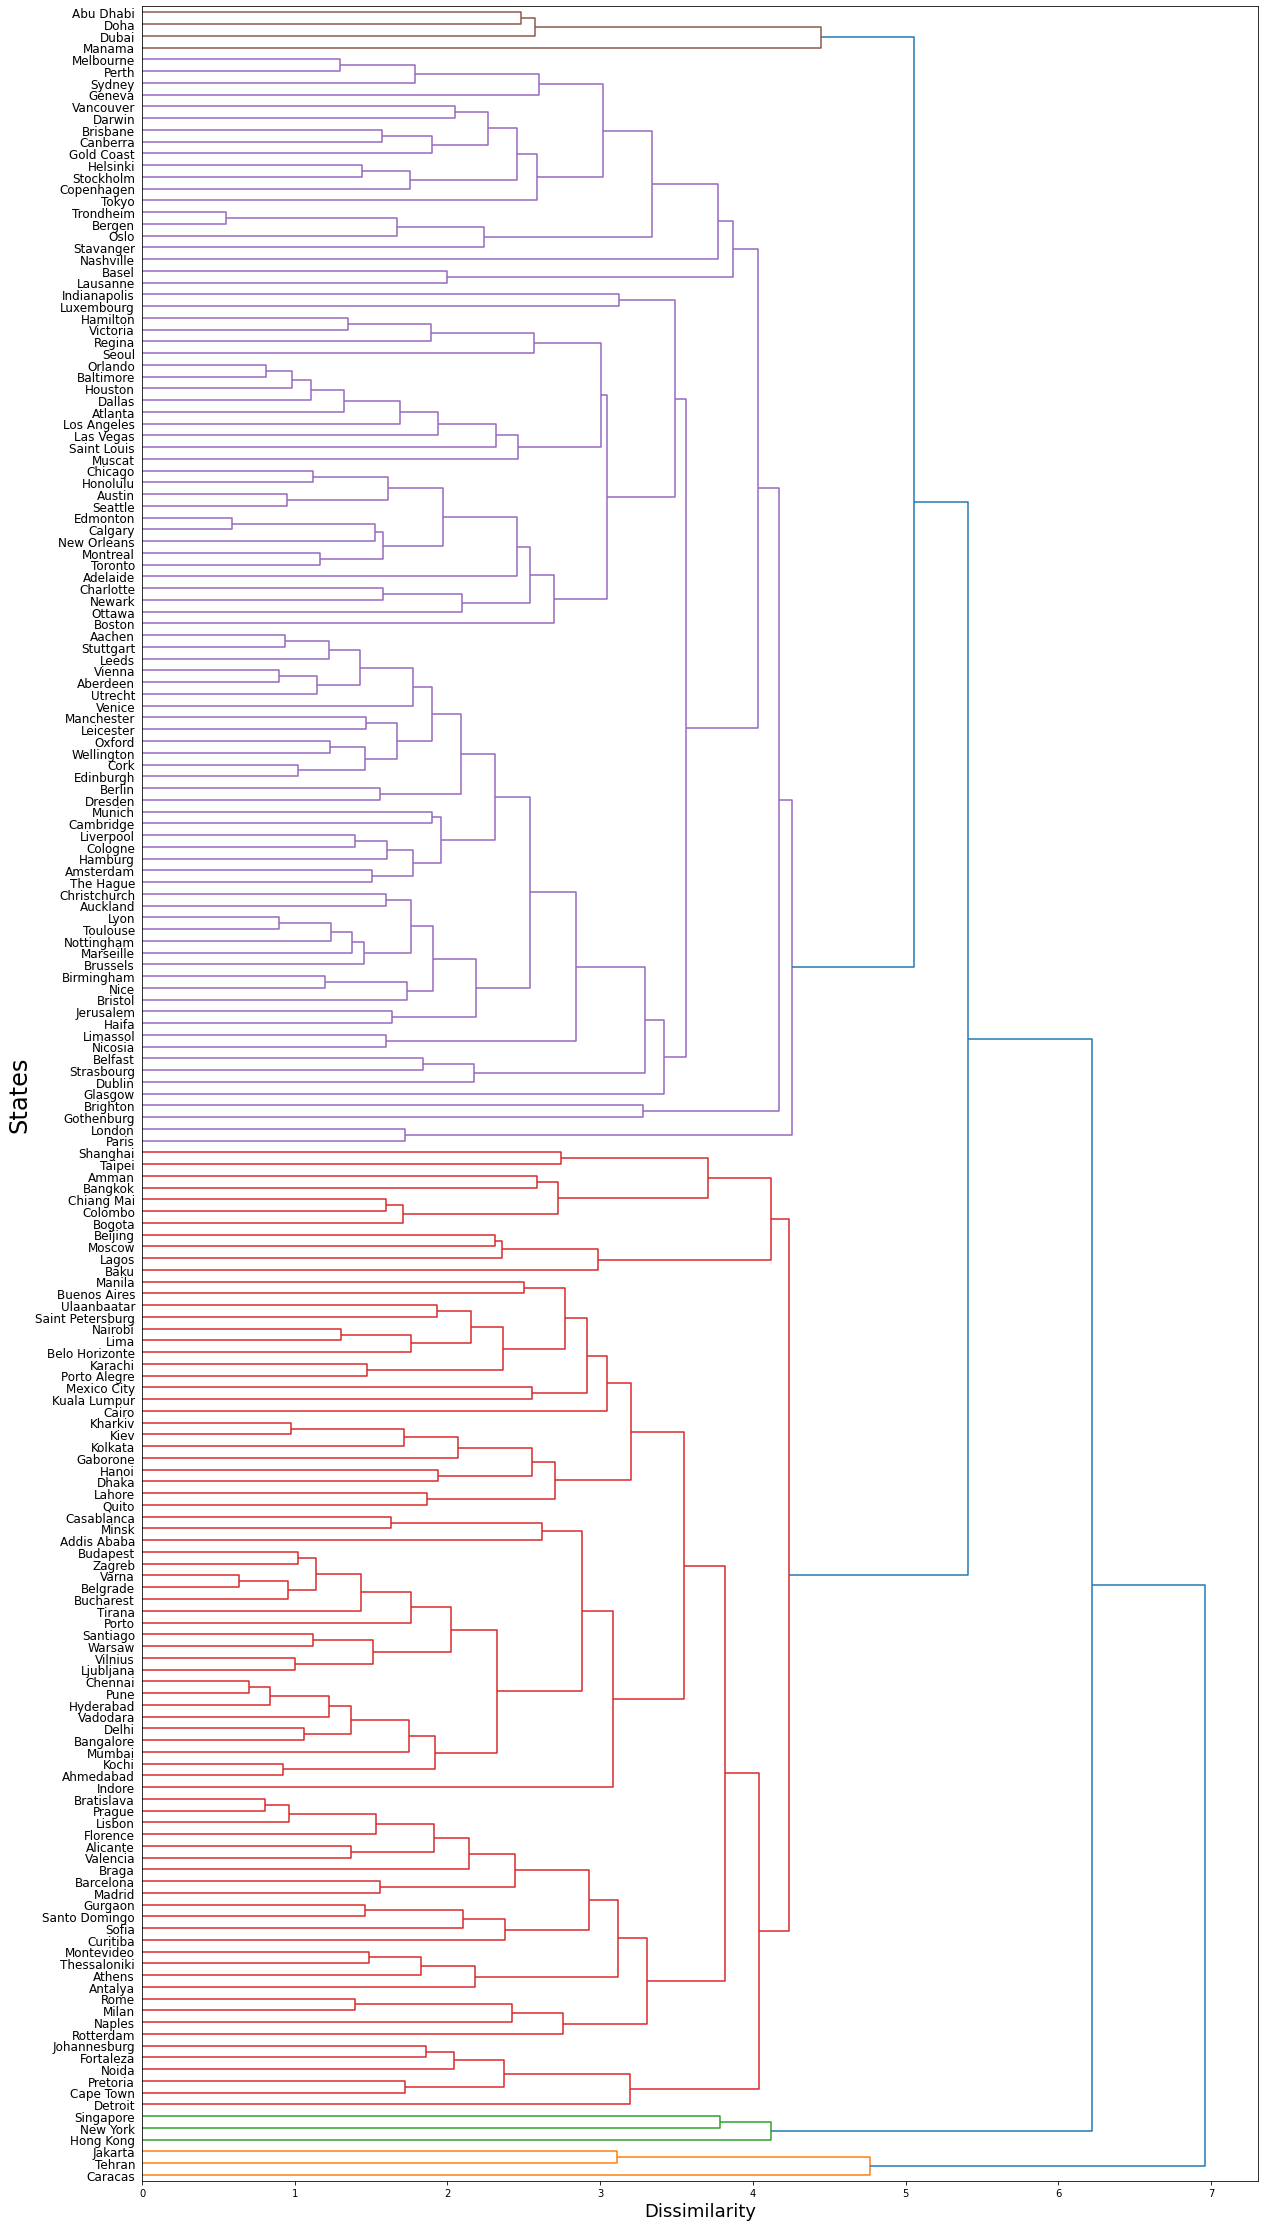

In [33]:
# average linkage
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='average')

fig, ax = plt.subplots(figsize=(20, 40))
d = dendrogram(Z, orientation='right', labels=df['City'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('States', fontsize=24)
plt.yticks(fontsize=12)
plt.show()

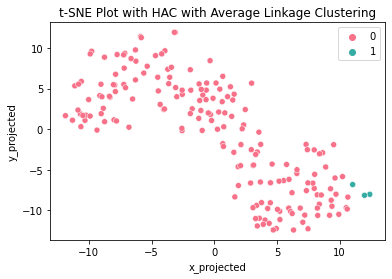

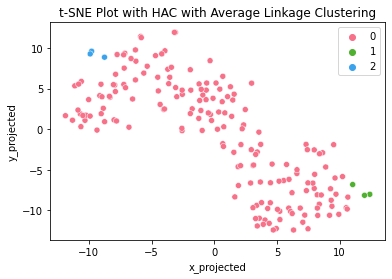

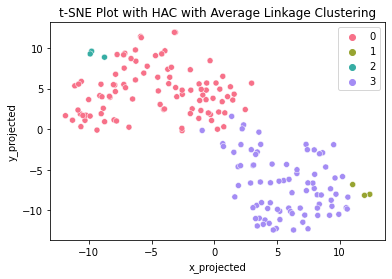

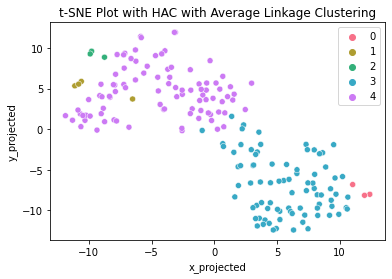

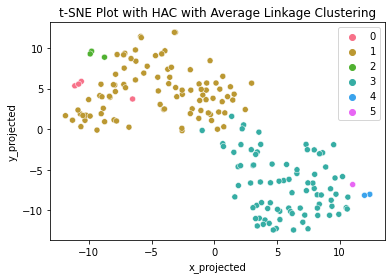

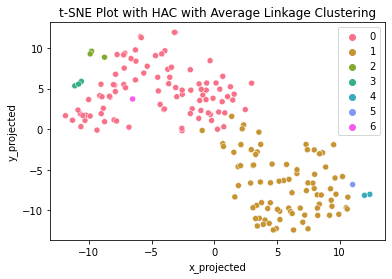

In [34]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with HAC with Average Linkage Clustering')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

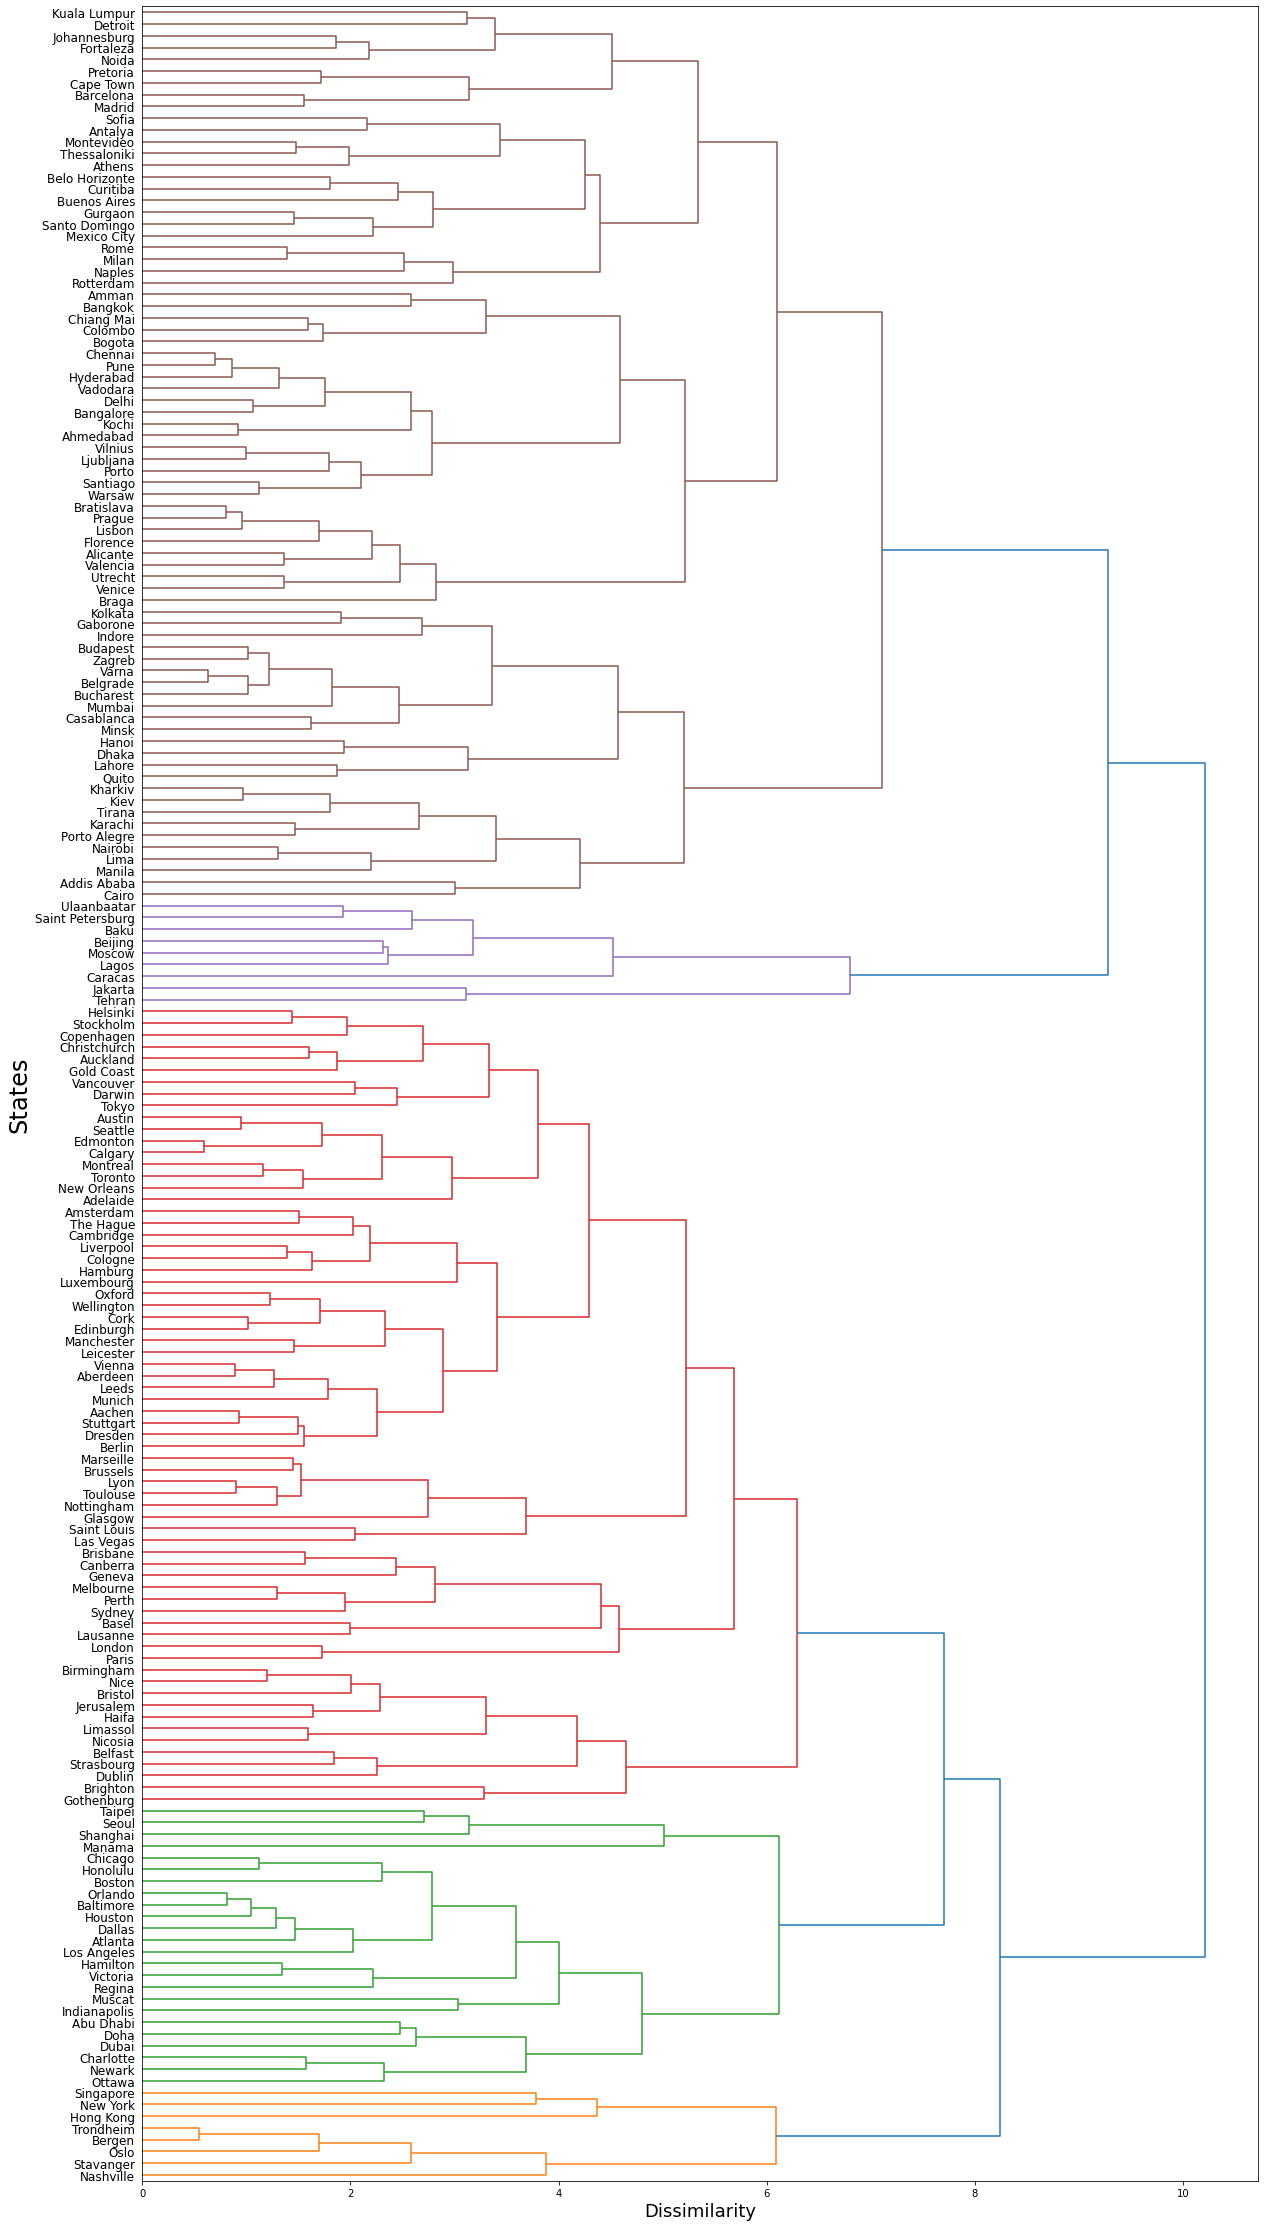

In [35]:
# complete linkage (less sensitive to outliers)
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(20, 40))
d = dendrogram(Z, orientation='right', labels=df['City'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('States', fontsize=24)
plt.yticks(fontsize=12)
plt.show()

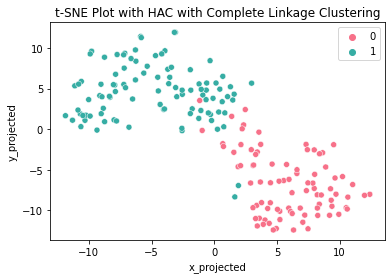

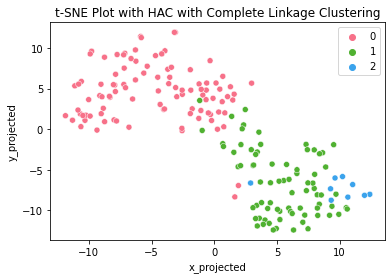

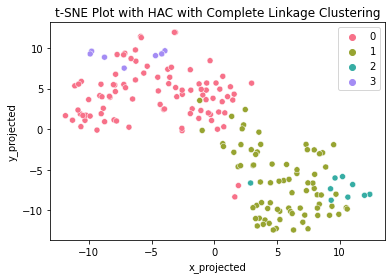

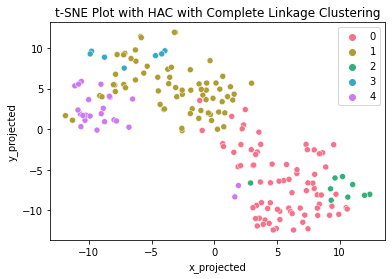

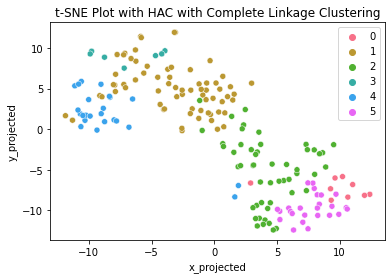

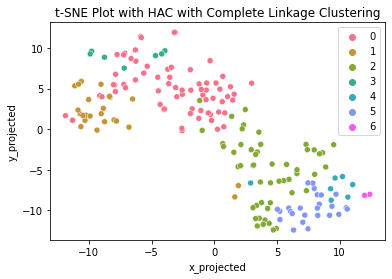

In [36]:
for k in range(2,8):
    #Clustering from dendrogram with k clusters
    hac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    df_combo['predicted_cluster'] = hac.fit_predict(X)
    
    
    #Map the resulting cluster labels onto our chosen t-SNE plot
    sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", k), data=df_combo)
    plt.title('t-SNE Plot with HAC with Complete Linkage Clustering')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

### 7.3. Clustering Algorithm Results Presentation

In [37]:
# we choose HAC with linkage == complete, k = 2

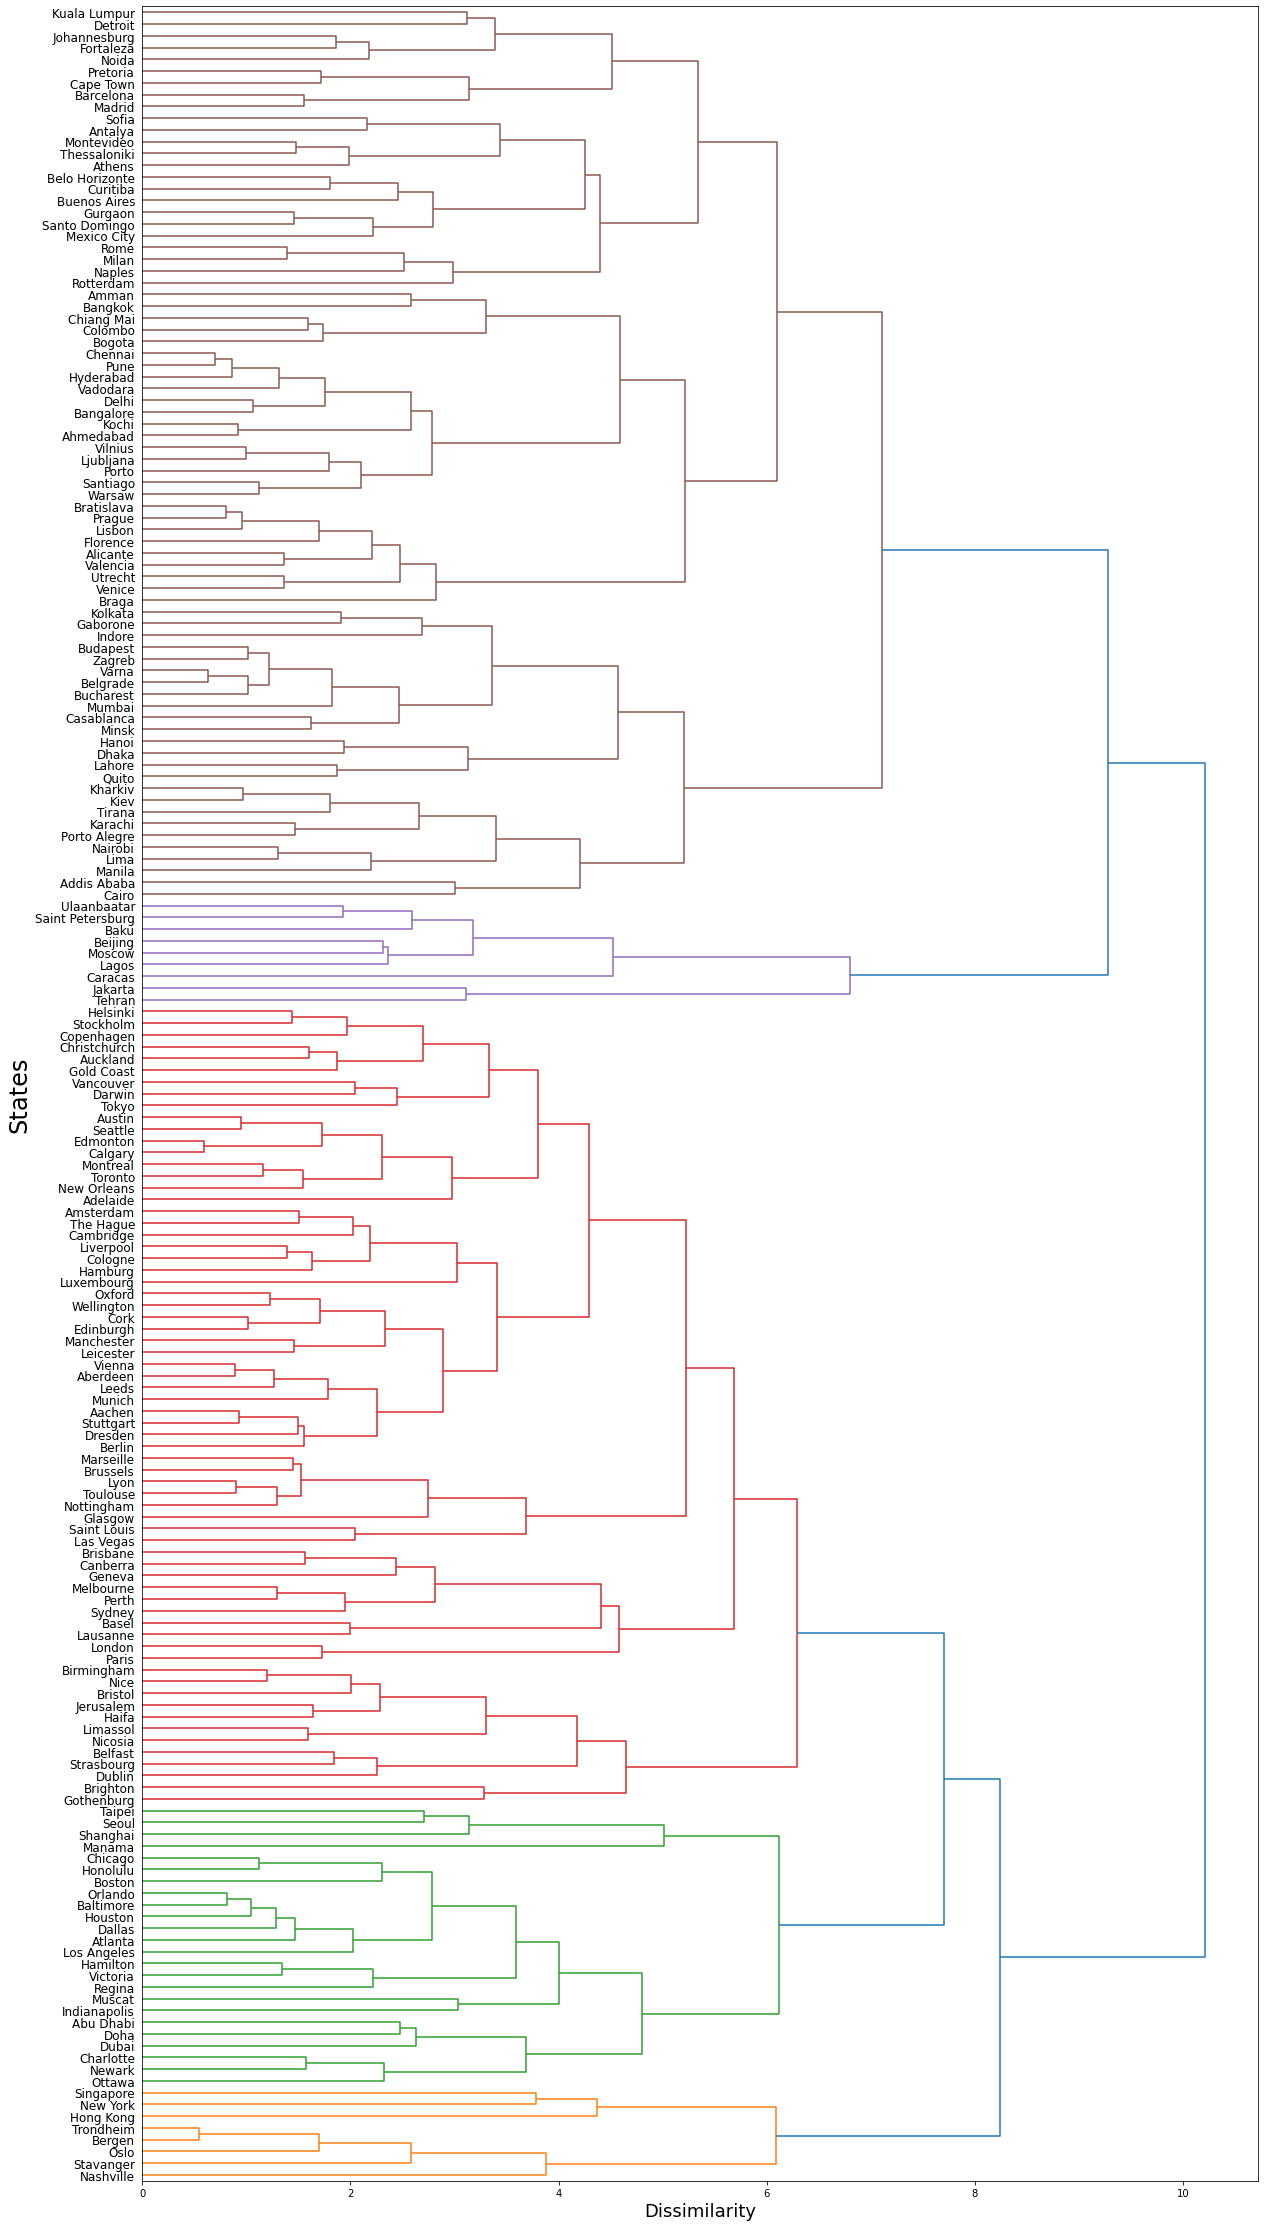

In [38]:
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(20, 40))
d = dendrogram(Z, orientation='right', labels=df['City'].array, ax=ax)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('States', fontsize=24)
plt.yticks(fontsize=12)
plt.show()

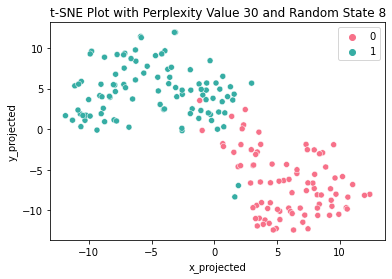

In [39]:
 #Clustering from dendrogram with k clusters
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df_combo['predicted_cluster'] = hac.fit_predict(X)
#Map the resulting cluster labels onto our chosen t-SNE plot
sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl",2), data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

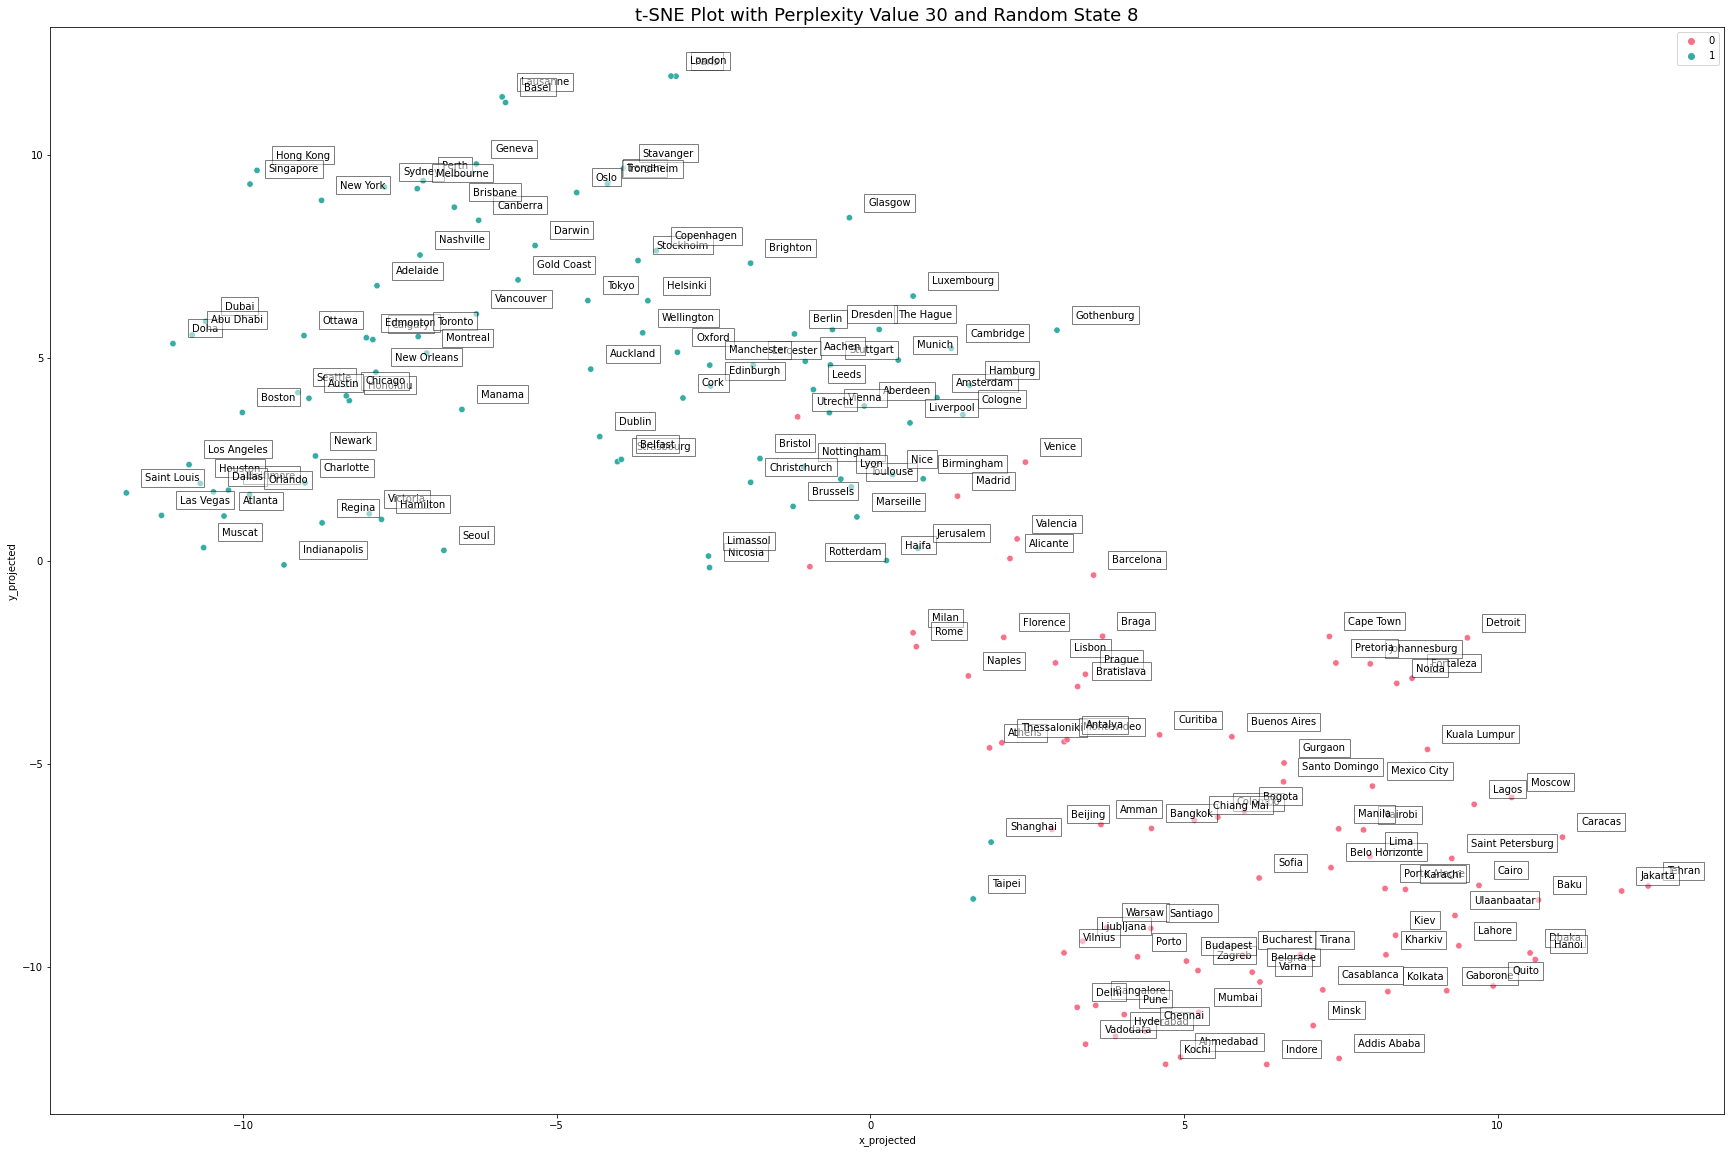

In [40]:
#Map the resulting cluster labels onto our chosen t-SNE plot
plt.figure(figsize=(30,20))
sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", 2), data=df_combo, s=40)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8),fontsize=18)
plt.legend(bbox_to_anchor=(1,1))
for i in range(df_combo.shape[0]):
    plt.text(x=df_combo.x_projected[i]+0.3,y=df_combo.y_projected[i]+0.3,s=df_combo.City[i],
    fontdict=dict(color='black',size=10),
    bbox=dict(facecolor='white',alpha=0.5))
plt.show()

In [41]:
# why taipei and shanghai is belongs to 1
# Note: the data is ordered by income。

In [42]:
df.loc[df['City'] =='Seoul']

City      Country  Cappuccino  Cinema   Wine  Gasoline  Avg Rent  \
95  Seoul  South Korea        2.59    5.25  11.67      1.17    1458.2   

    Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
95                 1458.2           82.43            54.3         75.0   

    Pollution  Quality of Life  Crime Rating  
95      85.59            60.28         21.35

In [43]:
df.loc[df['City'] =='Shanghai']

City Country  Cappuccino  Cinema  Wine  Gasoline  Avg Rent  \
133  Shanghai   China        2.96    8.46  8.46      0.85   1533.38   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
133                  592.2           75.69           26.74         78.7   

     Pollution  Quality of Life  Crime Rating  
133      61.74            31.66         16.51

In [44]:
df.loc[df['City'] =='Chicago']

City        Country  Cappuccino  Cinema  Wine  Gasoline  Avg Rent  \
39  Chicago  United States        2.45    7.85  7.85      0.71   1634.42   

    Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
39                2111.35           83.01           66.77        62.92   

    Pollution  Quality of Life  Crime Rating  
39      22.98            80.71         54.52

In [45]:
df.loc[df['City'] =='Taipei']

City Country  Cappuccino  Cinema  Wine  Gasoline  Avg Rent  \
112  Taipei  Taiwan        1.75    6.01  8.14      0.77    784.52   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
112                 942.66           77.42           38.19        88.89   

     Pollution  Quality of Life  Crime Rating  
112      87.62            52.35         15.71

In [46]:
# their overall is good, but income is low.

### 7.4. Assessing Clustering Separation and Cohesion

In [47]:
silhouette_avg = silhouette_score(X, df_combo['predicted_cluster'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.30124348638682524


In [48]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

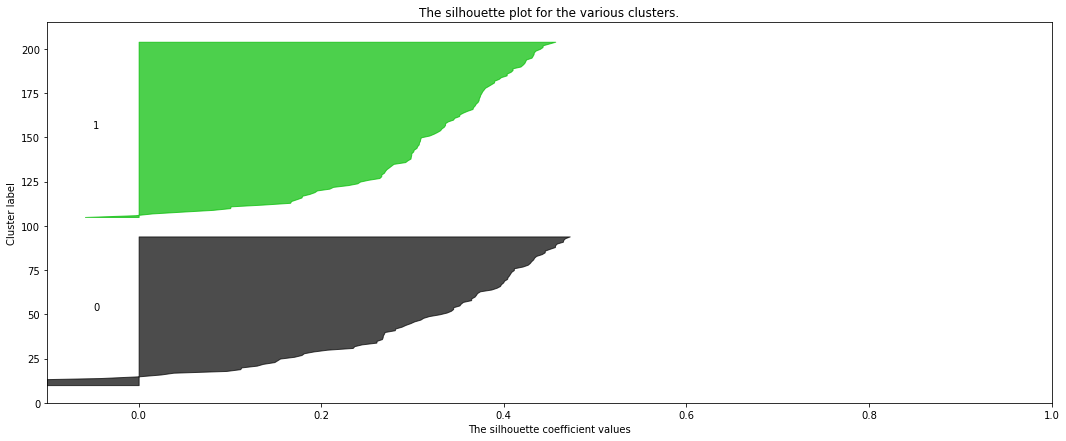

In [49]:
create_silhouette_plot(X, df_combo['predicted_cluster'])

Overall, the structure is pretty weak and should be an artificial dataset.
Cluster 1 has more objectives.
Cluster 1 has lower amount of cohesion and separation on average.
Cluster 0 contains more objects closer to other clusters (cluster 1) - We can use fuzzy c-means to cluster the real structure of it.


### 7.5. Additional Analysis

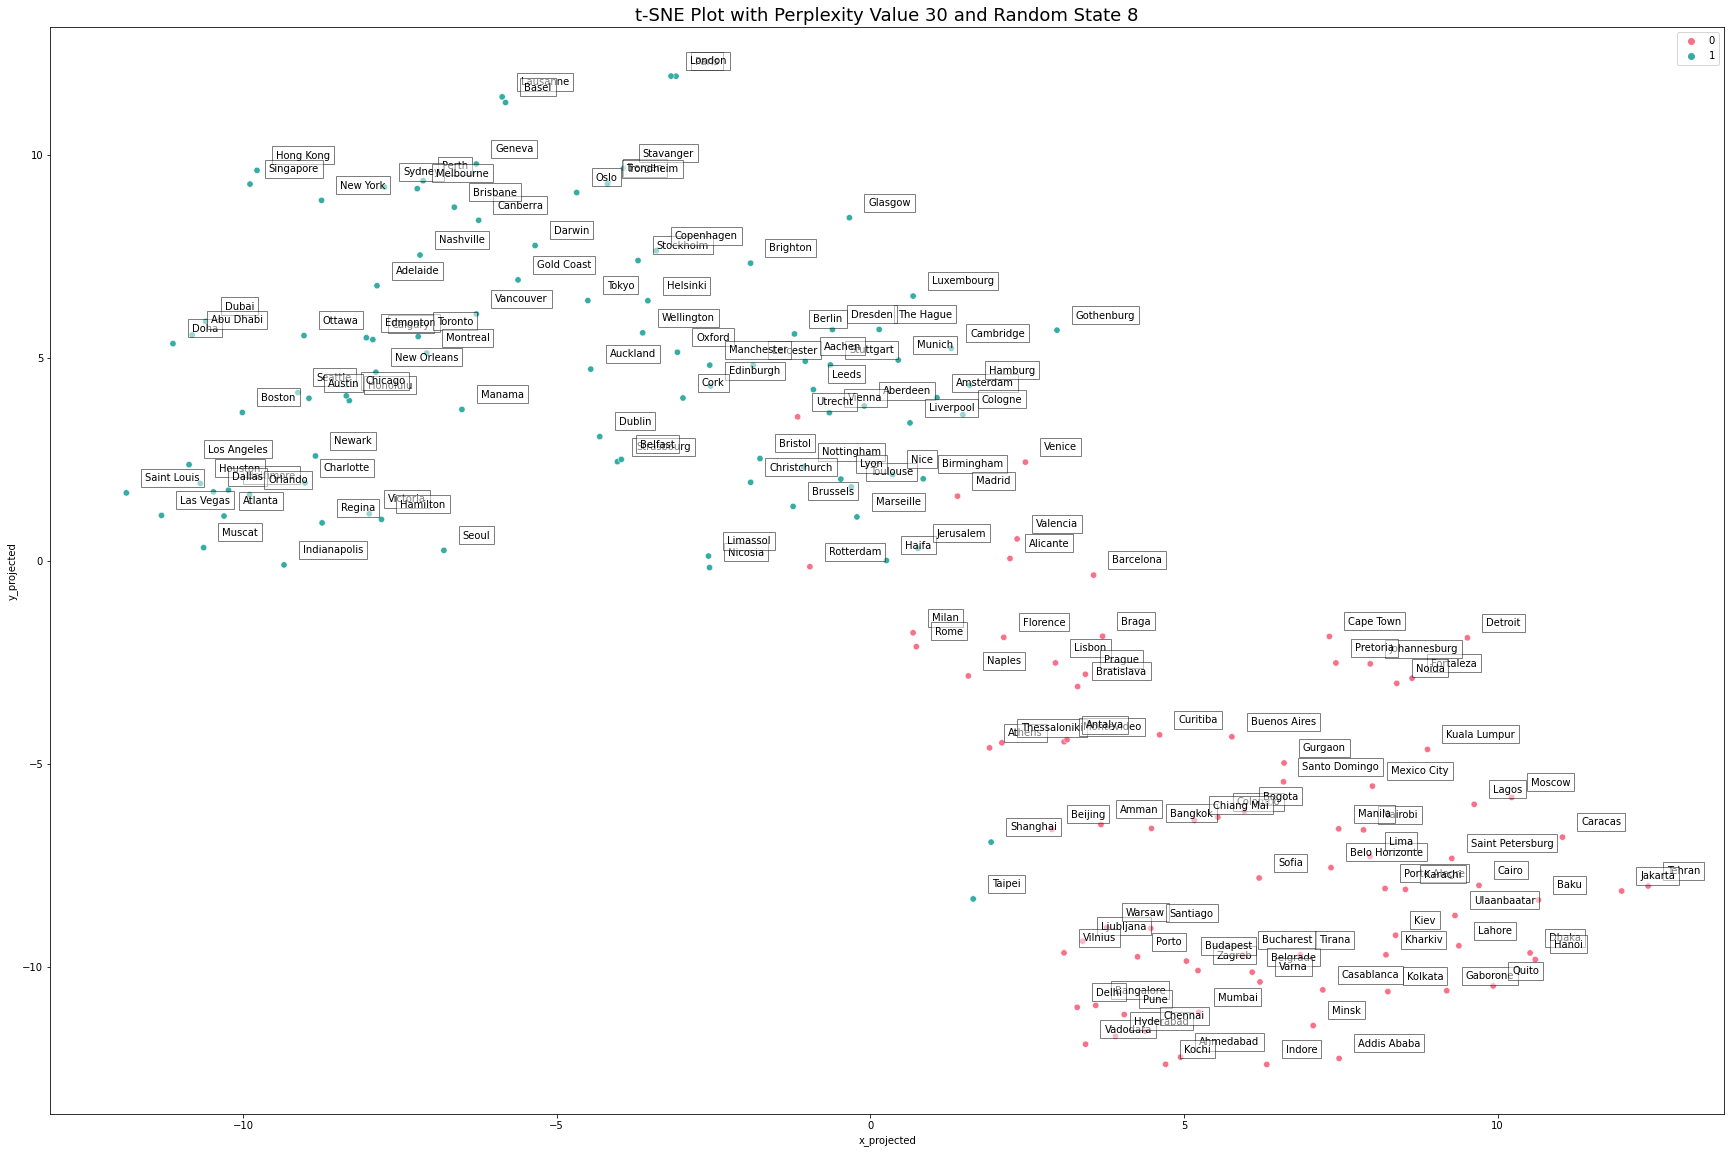

In [50]:
#Map the resulting cluster labels onto our chosen t-SNE plot
plt.figure(figsize=(30,20))
sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", 2), data=df_combo, s=40)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8),fontsize=18)
plt.legend(bbox_to_anchor=(1,1))
for i in range(df_combo.shape[0]):
    plt.text(x=df_combo.x_projected[i]+0.3,y=df_combo.y_projected[i]+0.3,s=df_combo.City[i],
    fontdict=dict(color='black',size=10),
    bbox=dict(facecolor='white',alpha=0.5))
plt.show()

In [145]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df_stand['predicted_cluster111']=kmeans.labels_

In [146]:
df_sort=df_stand.sort_values(by=['predicted_cluster'])
df_sort

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  \
0      1.541438  2.245574  0.403426  0.879256  0.909820   
78     0.541686  0.435528  0.747702 -0.527957 -0.024148   
77     0.752160  0.552778  1.694463 -0.355645  1.109572   
76     0.673232  0.552778  0.275806  0.994130  0.584785   
75    -0.076581  0.288966 -1.015231  0.879256 -0.177411   
..          ...       ...       ...       ...       ...   
127   -0.444911 -0.410870 -0.869803  0.218727 -0.818724   
126    0.120738 -0.095761 -0.249512 -1.131048 -0.098497   
125    0.133893 -0.359573 -0.920258 -0.355645 -0.754778   
144   -1.655136 -1.260932 -0.656115 -0.298208 -1.093730   
184   -1.405198 -1.550393 -0.299967 -0.499238 -1.326218   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
0                 3.160138        1.144158        2.223871    -0.009529   
78                0.290150        0.275260        0.360732     0.915143   
77                0.290150        0.448437        0.122057     1.190263   
76                0.330231        0.199966        0.233767     0.013957   
75                0.342333        0.386696        0.669287     0.126689   
..                     ...             ...             ...          ...   
127              -0.855697       -0.754768       -0.768667     0.007918   
126              -0.851175       -0.980651       -1.021613    -1.318697   
125              -0.810280       -0.349684       -0.801638     0.884276   
144              -1.068786       -0.254813       -0.340037     0.227343   
184              -1.400708       -0.486720       -0.481765    -2.325233   

     Pollution  Quality of Life  Crime Rating         Country  \
0     1.610749         0.641409     -0.373484     Switzerland   
78    0.889070         0.988112      0.051550          Canada   
77   -1.058961         0.581664     -0.713511          Canada   
76   -1.329253         0.590716     -1.071402  United Kingdom   
75    0.868991         1.076372     -0.895229         Germany   
..         ...              ...           ...             ...   
127   1.796092        -0.901102      0.044158           Chile   
126   1.238518        -1.496744      0.945354          Russia   
125   0.052324        -0.871682      1.099352       Argentina   
144   1.352813        -0.313608      0.580071           India   
184   0.521859        -0.475644     -1.520460           India   

     predicted_cluster  predicted_cluster111  
0                    0                     0  
78                   0                     0  
77                   0                     0  
76                   0                     0  
75                   0                     0  
..                 ...                   ...  
127                  1                     1  
126                  1                     1  
125                  1                     1  
144                  1                     1  
184                  1                     1  

[185 rows x 15 columns]

In [147]:
df_sort=df_sort.drop(['predicted_cluster', 'predicted_cluster111', 'Country'], axis=1)
df_sort.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0     1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
78    0.541686  0.435528  0.747702 -0.527957 -0.024148               0.290150   
77    0.752160  0.552778  1.694463 -0.355645  1.109572               0.290150   
76    0.673232  0.552778  0.275806  0.994130  0.584785               0.330231   
75   -0.076581  0.288966 -1.015231  0.879256 -0.177411               0.342333   

    Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0         1.144158        2.223871    -0.009529   1.610749         0.641409   
78        0.275260        0.360732     0.915143   0.889070         0.988112   
77        0.448437        0.122057     1.190263  -1.058961         0.581664   
76        0.199966        0.233767     0.013957  -1.329253         0.590716   
75        0.386696        0.669287     0.126689   0.868991         1.076372   

    Crime Rating  
0      -0.373484  
78      0.051550  
77     -0.713511  
76     -1.071402  
75     -0.895229

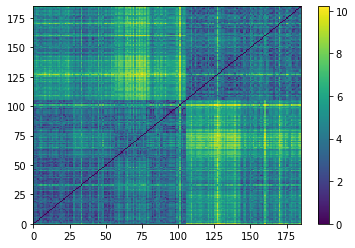

In [148]:
#Create a distance matrix
dist_mat = squareform(pdist(df_sort))

#Then visualize the distance matrix with a heat map.
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [ ]:
# cluster 0 is have better cohesion than cluster 1
# there are outliers occurs, such as x = 125.

### 7.6. Describing Each of the Clusters

In [51]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df['predicted_cluster_2'] = hac.fit_predict(X)

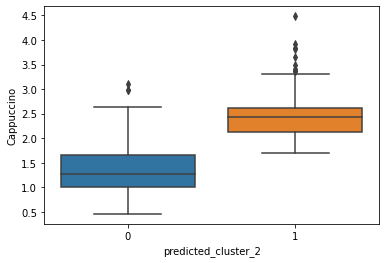

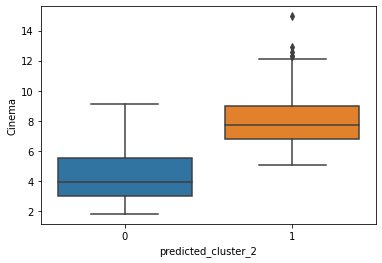

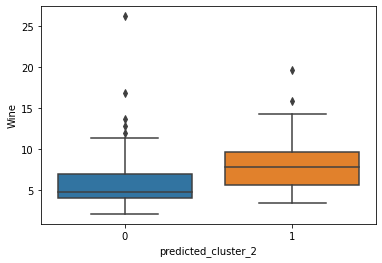

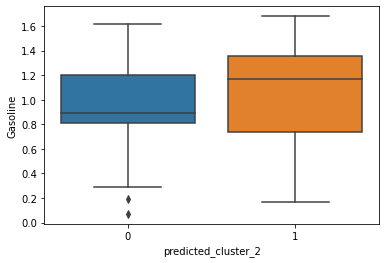

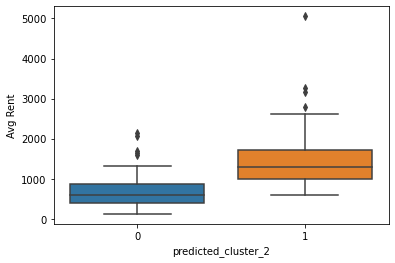

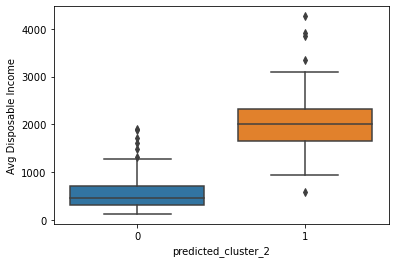

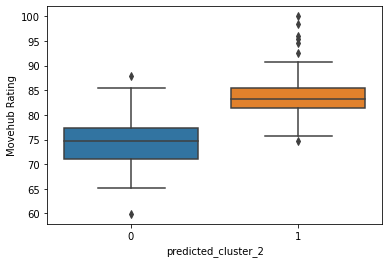

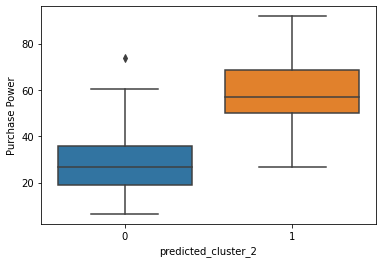

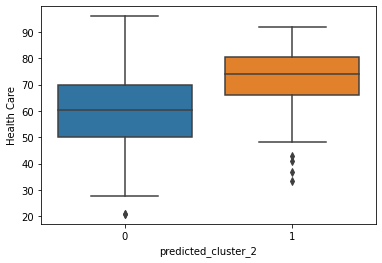

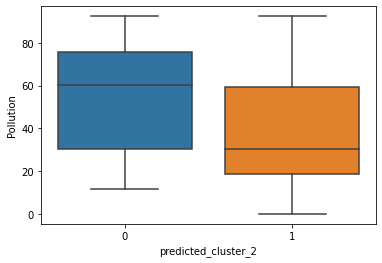

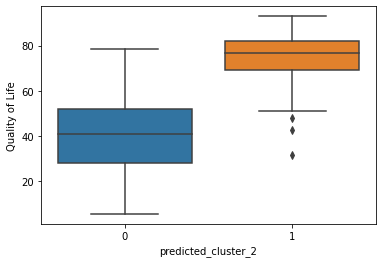

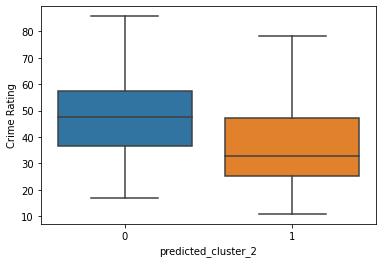

In [52]:
for col in df.columns[2:14]:
    sns.boxplot(x='predicted_cluster_2', y=col, data=df)
    plt.show()

It can be seen that cities in Cluster 0 do better on Avg Rent, but bad at Cappuccino, Cinema, Avg Disposable income, Movehub Rating, Purchase Power, Health Care, Pollution, Quality of Life, Crime Rating. In addition, the two clusters all have have similar performance on Wine and Gasoline

## 8. Clustering Algorithm 2 (change name to the algorithm you chose)



### 8.1. Parameter Selection

In [56]:
X_array=np.array(X).T

In [60]:
df = df.drop(['predicted_cluster_2'], axis=1)

No handles with labels found to put in legend.


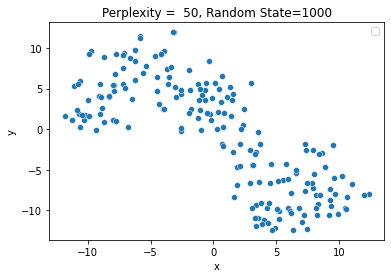

In [61]:
# Perform the TSNE non-linear dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=100)
data_tsne = tsne.fit_transform(X)

#concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', data=dff)
plt.title('Perplexity =  50, Random State=1000')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

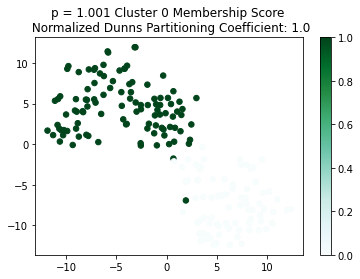

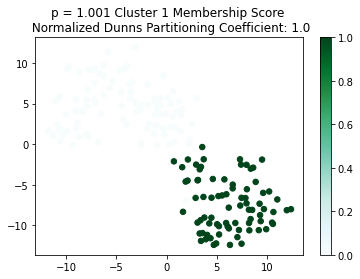

----------------------------------------


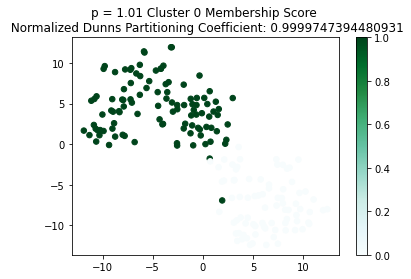

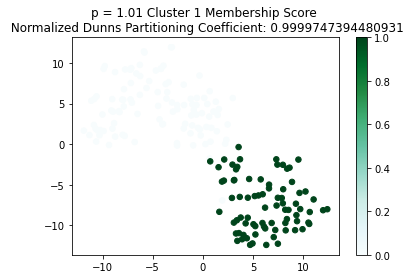

----------------------------------------


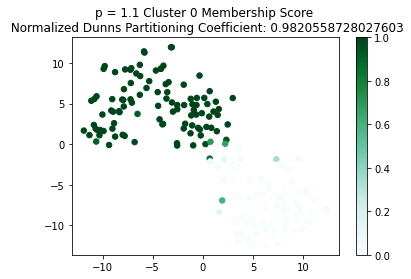

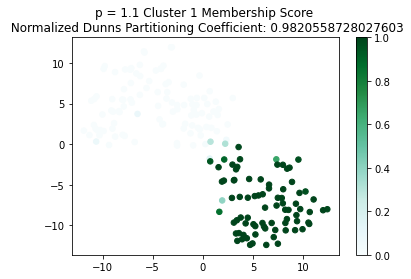

----------------------------------------


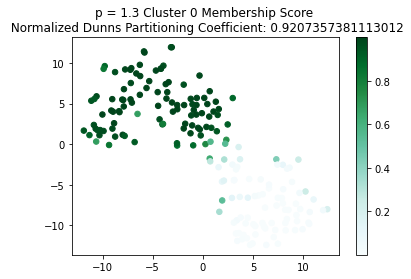

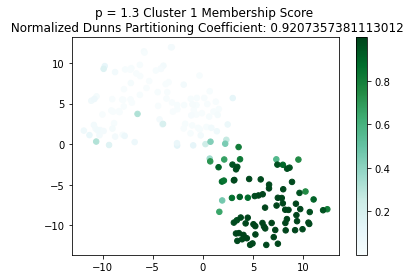

----------------------------------------


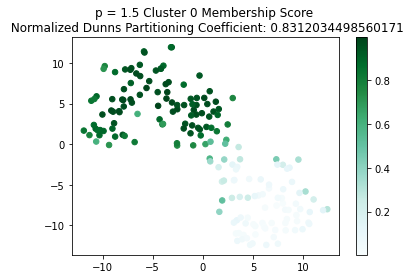

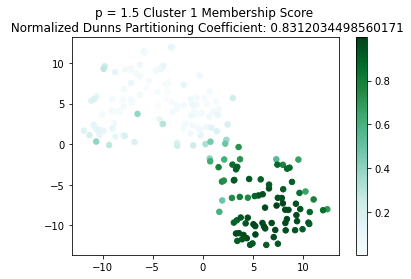

----------------------------------------


In [139]:
# Number of clusters
K=2
for p in [1.001, 1.01,1.1,1.3,1.5]:
    cntr, W, _, _, _, _, pc = cmeans(X_array, c=K, m=p, error=1e-6, maxiter=20000, seed=1000)
    for i in range(0,K):
        dff['Cluster %s Membership Score'%str(i)]=W[i,:]
        # Plot the projected (x,y) coordinates
        points = plt.scatter(dff["x"], dff["y"],
                 c=dff['Cluster %s Membership Score'%str(i)], s=30, cmap="BuGn")
        plt.colorbar(points)
        plt.title('p = %s Cluster %s Membership Score \n Normalized Dunns Partitioning Coefficient: %s'%(p,str(i),pc))
        plt.show()
    print('----------------------------------------')

### 8.2. Clustering Algorithm

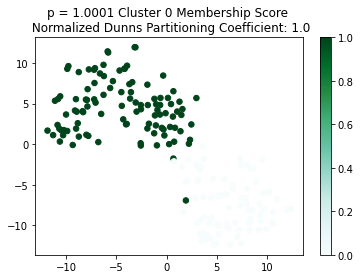

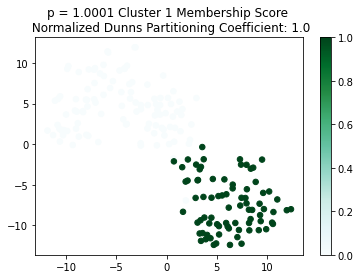

----------------------------------------


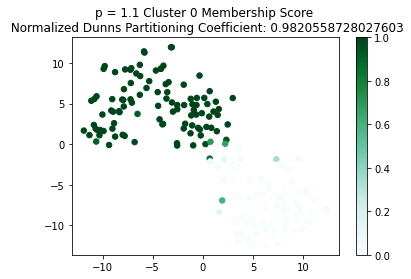

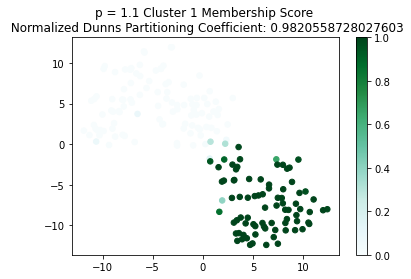

----------------------------------------


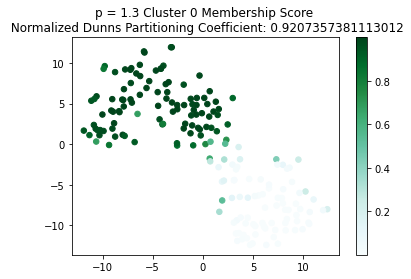

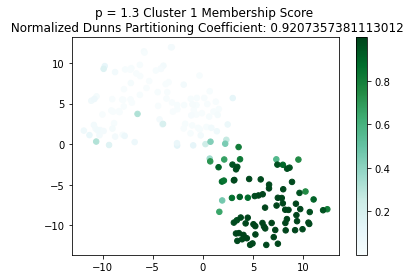

----------------------------------------


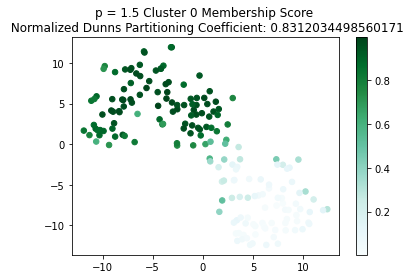

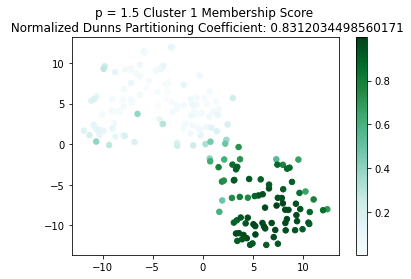

----------------------------------------


In [144]:
# Number of clusters
K=2
for p in [1.0001,1.1,1.3,1.5]:
    cntr, W, _, _, _, _, pc = cmeans(X_array, c=K, m=p, error=1e-6, maxiter=20000, seed=1000)
    for i in range(0,K):
        dff['Cluster %s Membership Score'%str(i)]=W[i,:]
        # Plot the projected (x,y) coordinates
        points = plt.scatter(dff["x"], dff["y"],
                 c=dff['Cluster %s Membership Score'%str(i)], s=30, cmap="BuGn")
        plt.colorbar(points)
        plt.title('p = %s Cluster %s Membership Score \n Normalized Dunns Partitioning Coefficient: %s'%(p,str(i),pc))
        plt.show()
    print('----------------------------------------')

### 8.3. Clustering Algorithm Results Presentation

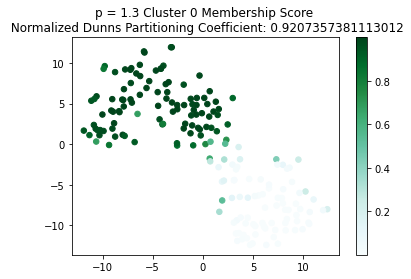

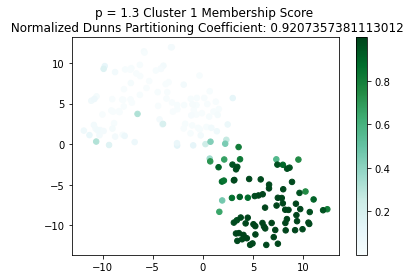

----------------------------------------


In [57]:
K=2
for p in [1.3]:
    cntr, W, _, _, _, _, pc = cmeans(X_array, c=K, m=p, error=1e-6, maxiter=20000, seed=1000)
    for i in range(0,K):
        dff['Cluster %s Membership Score'%str(i)]=W[i,:]
        # Plot the projected (x,y) coordinates
        points = plt.scatter(dff["x"], dff["y"],
                 c=dff['Cluster %s Membership Score'%str(i)], s=30, cmap="BuGn")
        plt.colorbar(points)
        plt.title('p = %s Cluster %s Membership Score \n Normalized Dunns Partitioning Coefficient: %s'%(p,str(i),pc))
        plt.show()
    print('----------------------------------------')

### 8.4. Assessing Clustering Separation and Cohesion

In [124]:
kmeans=KMeans(n_clusters=2, random_state=100).fit(X)
df_combo['predicted_cluster']=kmeans.labels_

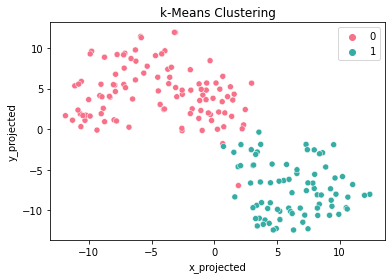

In [125]:
#Plot the t-SNE plot
sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster',
                palette=sns.color_palette('husl', 2), data=df_combo)
plt.title('k-Means Clustering')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [126]:
df_stand['predicted_cluster']=kmeans.labels_
df_stand.head()
silhouette_avg = silhouette_score(X, df_combo['predicted_cluster'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.32123364403717863


In [162]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

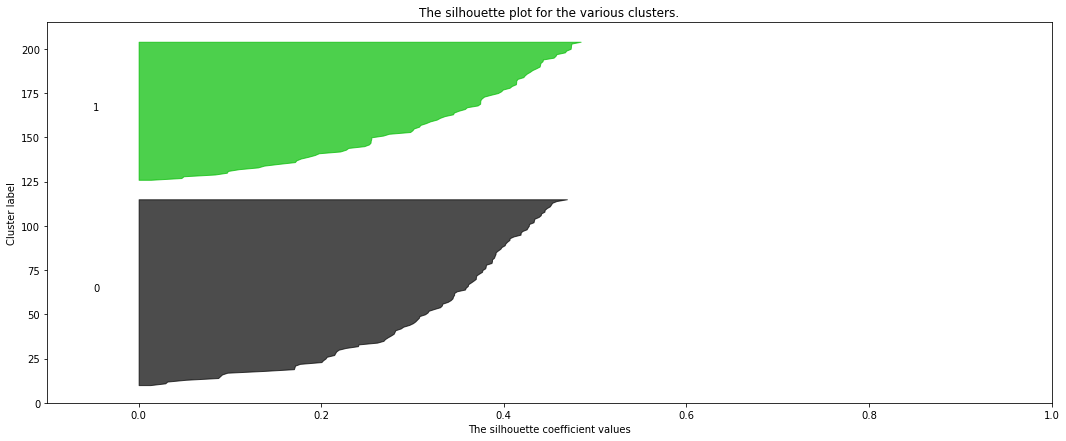

In [163]:
create_silhouette_plot(X, df_combo['predicted_cluster'])

### 8.5. Additional Analysis

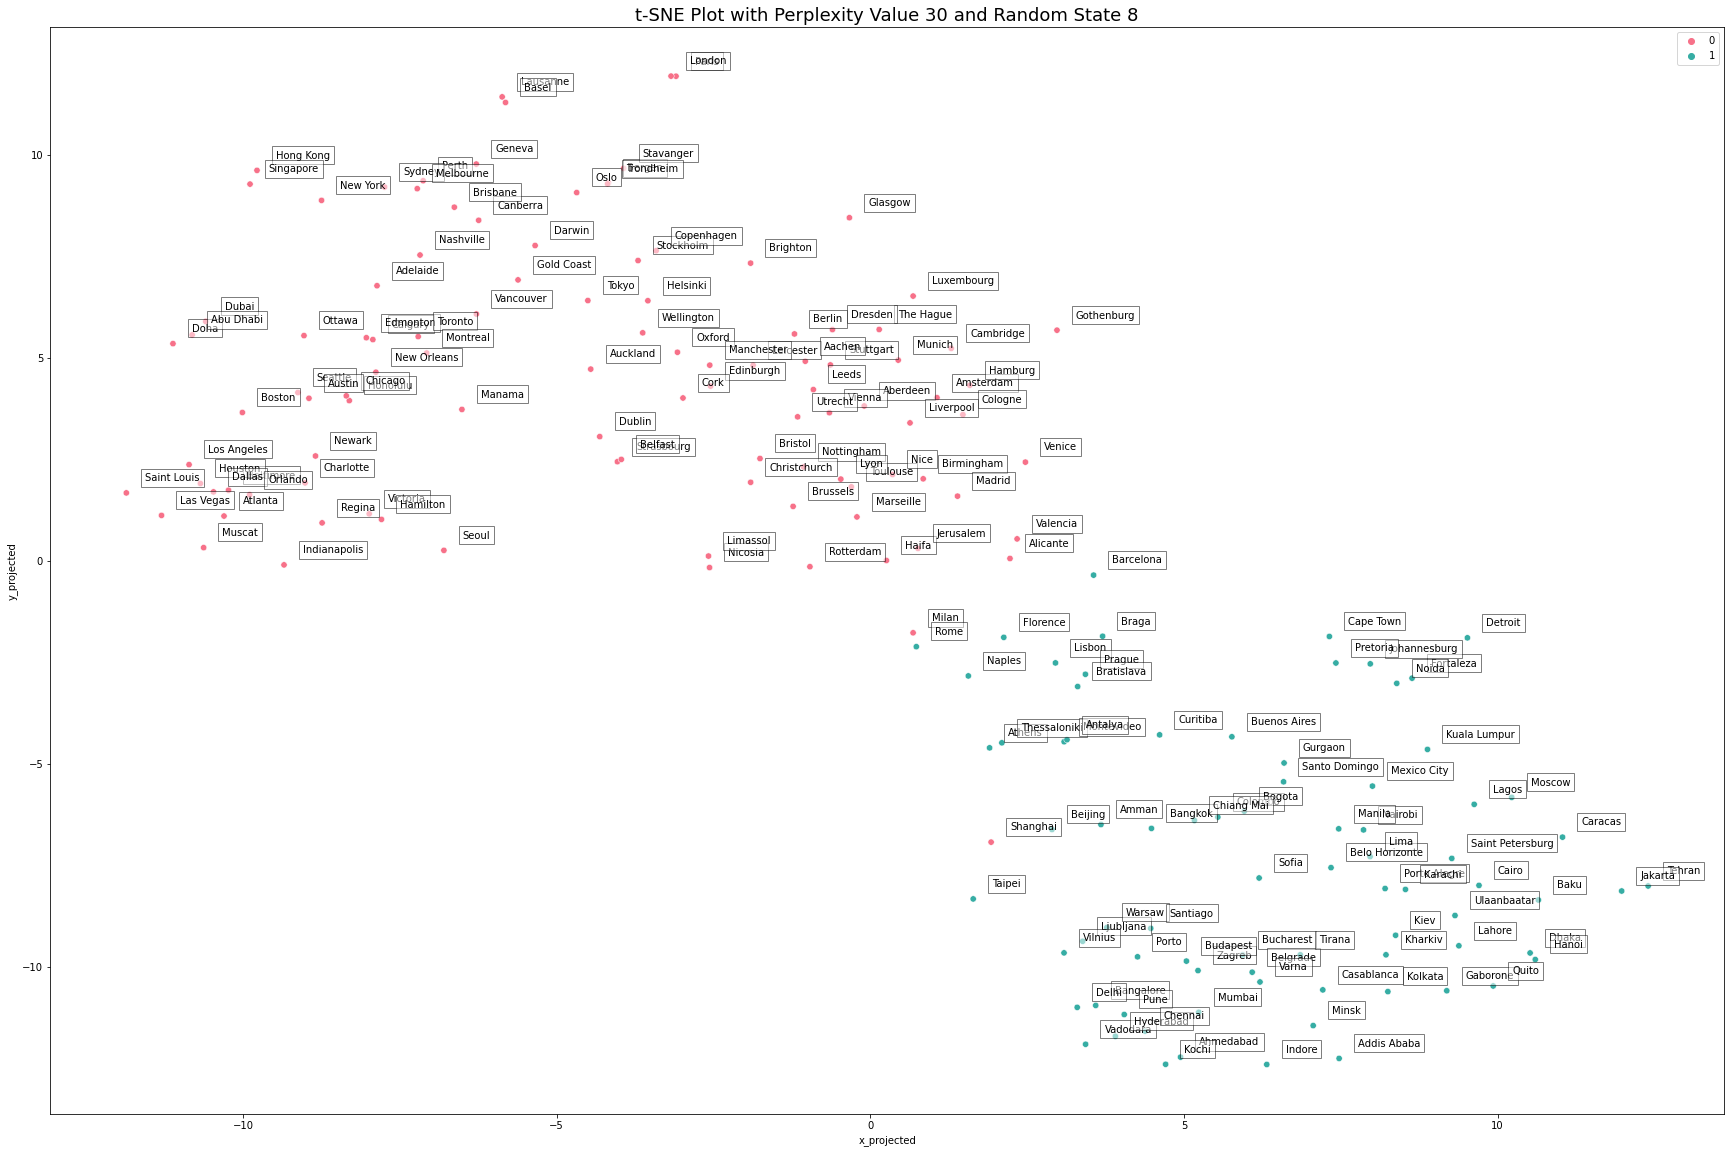

In [133]:
#Map the resulting cluster labels onto our chosen t-SNE plot
plt.figure(figsize=(30,20))
sns.scatterplot(x='x_projected',y='y_projected', hue='predicted_cluster', palette=sns.color_palette("husl", 2), data=df_combo, s=40)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 8),fontsize=18)
plt.legend(bbox_to_anchor=(1,1))
for i in range(df_combo.shape[0]):
    plt.text(x=df_combo.x_projected[i]+0.3,y=df_combo.y_projected[i]+0.3,s=df_combo.City[i],
    fontdict=dict(color='black',size=10),
    bbox=dict(facecolor='white',alpha=0.5))
plt.show()

In [149]:
df_stand['predicted_cluster']=kmeans.labels_
df_stand.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0    1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
1    1.081026  2.373816  1.023717  0.764381  2.234608               2.776835   
2    2.001850  1.989090  0.091796  0.678225  0.813923               2.699865   
3    1.173108  1.820543  0.902033 -0.125896  1.456867               2.161631   
4    2.449107  2.029395  1.917055 -1.044892  1.714726               1.865894   

   Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0        1.144158        2.223871    -0.009529   1.610749         0.641409   
1        0.550838        0.769678     0.596406  -0.636148         1.073656   
2        0.690886        1.603809     0.922524   0.512592         1.323047   
3        2.374470        0.813476     0.977548  -0.863965         0.705228   
4        0.150271        1.708629    -0.381947  -1.772531         0.971365   

   Crime Rating        Country  predicted_cluster  predicted_cluster111  
0     -0.373484    Switzerland                  0                     0  
1      0.785196    Switzerland                  0                     0  
2     -0.831166    Switzerland                  0                     0  
3      0.517240      Australia                  0                     0  
4     -0.992555  United States                  0                     0

In [150]:
df_sort=df_stand.sort_values(by=['predicted_cluster'])
df_sort

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  \
0      1.541438  2.245574  0.403426  0.879256  0.909820   
78     0.541686  0.435528  0.747702 -0.527957 -0.024148   
77     0.752160  0.552778  1.694463 -0.355645  1.109572   
76     0.673232  0.552778  0.275806  0.994130  0.584785   
75    -0.076581  0.288966 -1.015231  0.879256 -0.177411   
..          ...       ...       ...       ...       ...   
127   -0.444911 -0.410870 -0.869803  0.218727 -0.818724   
126    0.120738 -0.095761 -0.249512 -1.131048 -0.098497   
125    0.133893 -0.359573 -0.920258 -0.355645 -0.754778   
144   -1.655136 -1.260932 -0.656115 -0.298208 -1.093730   
184   -1.405198 -1.550393 -0.299967 -0.499238 -1.326218   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
0                 3.160138        1.144158        2.223871    -0.009529   
78                0.290150        0.275260        0.360732     0.915143   
77                0.290150        0.448437        0.122057     1.190263   
76                0.330231        0.199966        0.233767     0.013957   
75                0.342333        0.386696        0.669287     0.126689   
..                     ...             ...             ...          ...   
127              -0.855697       -0.754768       -0.768667     0.007918   
126              -0.851175       -0.980651       -1.021613    -1.318697   
125              -0.810280       -0.349684       -0.801638     0.884276   
144              -1.068786       -0.254813       -0.340037     0.227343   
184              -1.400708       -0.486720       -0.481765    -2.325233   

     Pollution  Quality of Life  Crime Rating         Country  \
0     1.610749         0.641409     -0.373484     Switzerland   
78    0.889070         0.988112      0.051550          Canada   
77   -1.058961         0.581664     -0.713511          Canada   
76   -1.329253         0.590716     -1.071402  United Kingdom   
75    0.868991         1.076372     -0.895229         Germany   
..         ...              ...           ...             ...   
127   1.796092        -0.901102      0.044158           Chile   
126   1.238518        -1.496744      0.945354          Russia   
125   0.052324        -0.871682      1.099352       Argentina   
144   1.352813        -0.313608      0.580071           India   
184   0.521859        -0.475644     -1.520460           India   

     predicted_cluster  predicted_cluster111  
0                    0                     0  
78                   0                     0  
77                   0                     0  
76                   0                     0  
75                   0                     0  
..                 ...                   ...  
127                  1                     1  
126                  1                     1  
125                  1                     1  
144                  1                     1  
184                  1                     1  

[185 rows x 15 columns]

In [152]:
df_sort=df_sort.drop(['predicted_cluster111', 'predicted_cluster', 'Country'], axis=1)
df_sort.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0     1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
78    0.541686  0.435528  0.747702 -0.527957 -0.024148               0.290150   
77    0.752160  0.552778  1.694463 -0.355645  1.109572               0.290150   
76    0.673232  0.552778  0.275806  0.994130  0.584785               0.330231   
75   -0.076581  0.288966 -1.015231  0.879256 -0.177411               0.342333   

    Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0         1.144158        2.223871    -0.009529   1.610749         0.641409   
78        0.275260        0.360732     0.915143   0.889070         0.988112   
77        0.448437        0.122057     1.190263  -1.058961         0.581664   
76        0.199966        0.233767     0.013957  -1.329253         0.590716   
75        0.386696        0.669287     0.126689   0.868991         1.076372   

    Crime Rating  
0      -0.373484  
78      0.051550  
77     -0.713511  
76     -1.071402  
75     -0.895229

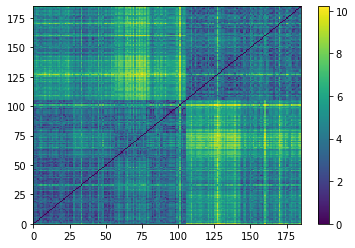

In [153]:
#Create a distance matrix
dist_mat = squareform(pdist(df_sort))

#Then visualize the distance matrix with a heat map.
plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [ ]:
# cluster 0 is have better cohesion than cluster 1
# there are outliers occurs, such as x = 125.

### 8.6. Describing Each of the Clusters

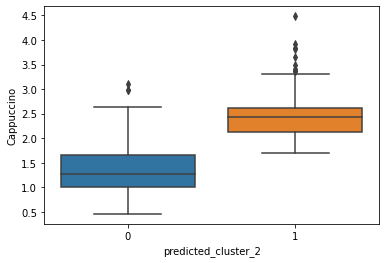

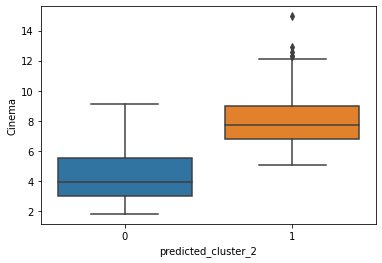

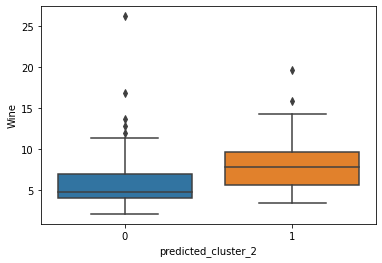

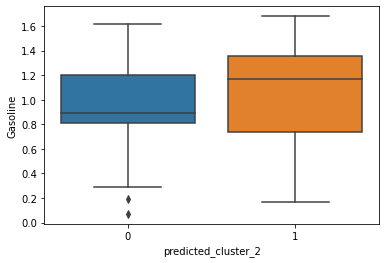

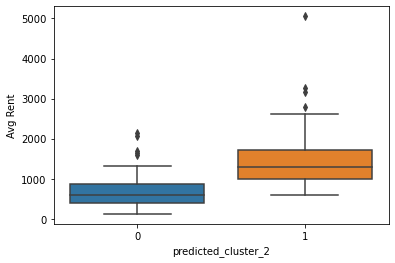

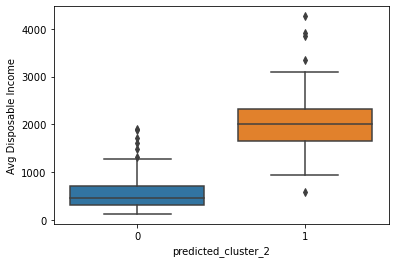

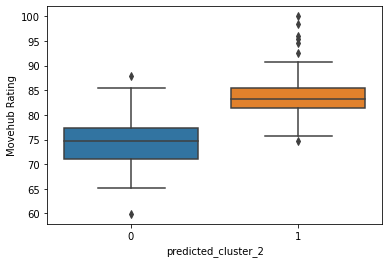

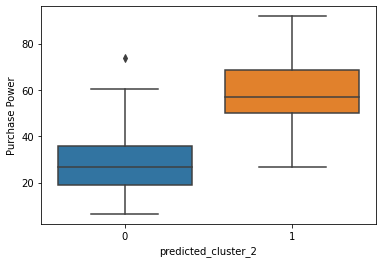

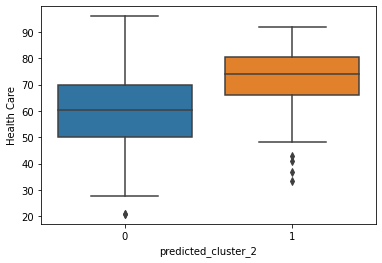

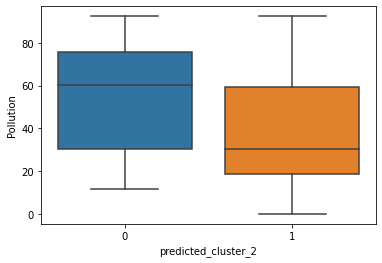

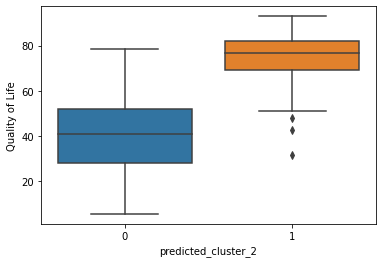

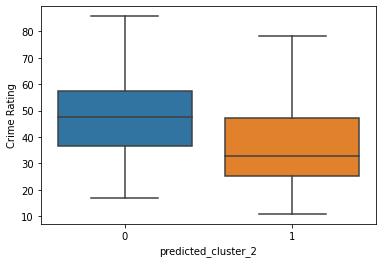

In [129]:
for col in df.columns[2:14]:
    sns.boxplot(x='predicted_cluster_2', y=col, data=df)
    plt.show()

In [134]:
# The correlation coefficient· is 0.52, which is not "very" high (with correlation =1 being the highest indicating perfect cohesion and separation).

In [135]:
# k-means
df_membership.loc[(df_membership['Cluster 0 Membership Score'] > 0.4) & (df_membership['Cluster 0 Membership Score'] < 0.6)]

Cluster 0 Membership Score  Cluster 1 Membership Score
102                    0.436734                    0.563266
108                    0.567762                    0.432238
115                    0.548296                    0.451704
133                    0.532077                    0.467923

In [131]:
df.loc[[102, 108, 115,133], :]

City       Country  Cappuccino  Cinema  Wine  Gasoline  Avg Rent  \
102  Cape Town  South Africa        1.27    3.18  3.53      0.82    811.48   
108  Jerusalem        Israel        2.52    6.84  6.30      1.43    810.35   
115   Alicante         Spain        1.28    6.01  4.03      1.19    511.49   
133   Shanghai         China        2.96    8.46  8.46      0.85   1533.38   

     Avg Disposable Income  Movehub Rating  Purchase Power  Health Care  \
102                1199.58           87.95           60.36        71.67   
108                1080.46           78.28           37.22        79.40   
115                 852.48           82.83           44.69        75.61   
133                 592.20           75.69           26.74        78.70   

     Pollution  Quality of Life  Crime Rating  predicted_cluster_2  \
102      75.98            78.73         68.06                    0   
108      64.44            50.87         46.59                    1   
115      28.19            72.53         44.01                    0   
133      61.74            31.66         16.51                    1   

     predicted_cluster_3  
102                    1  
108                    0  
115                    0  
133                    0

## 9. Analysis Summary and Conclusion

### 9.1. Algorithm Comparison Summary

#### 9.1.1. Comparing Algorithm Performance

In [188]:
kmeans=KMeans(n_clusters=2, random_state=100).fit(X)
df_combo['predicted_cluster']=kmeans.labels_

In [189]:
silhouette_avg = silhouette_score(X, df_combo['predicted_cluster'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.32123364403717863


In [190]:
df_stand['predicted_cluster']=kmeans.labels_
df_stand.head()

Cappuccino    Cinema      Wine  Gasoline  Avg Rent  Avg Disposable Income  \
0    1.541438  2.245574  0.403426  0.879256  0.909820               3.160138   
1    1.081026  2.373816  1.023717  0.764381  2.234608               2.776835   
2    2.001850  1.989090  0.091796  0.678225  0.813923               2.699865   
3    1.173108  1.820543  0.902033 -0.125896  1.456867               2.161631   
4    2.449107  2.029395  1.917055 -1.044892  1.714726               1.865894   

   Movehub Rating  Purchase Power  Health Care  Pollution  Quality of Life  \
0        1.144158        2.223871    -0.009529   1.610749         0.641409   
1        0.550838        0.769678     0.596406  -0.636148         1.073656   
2        0.690886        1.603809     0.922524   0.512592         1.323047   
3        2.374470        0.813476     0.977548  -0.863965         0.705228   
4        0.150271        1.708629    -0.381947  -1.772531         0.971365   

   Crime Rating        Country  predicted_cluster  predicted_cluster111  
0     -0.373484    Switzerland                  0                     0  
1      0.785196    Switzerland                  0                     0  
2     -0.831166    Switzerland                  0                     0  
3      0.517240      Australia                  0                     0  
4     -0.992555  United States                  0                     0

In [191]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

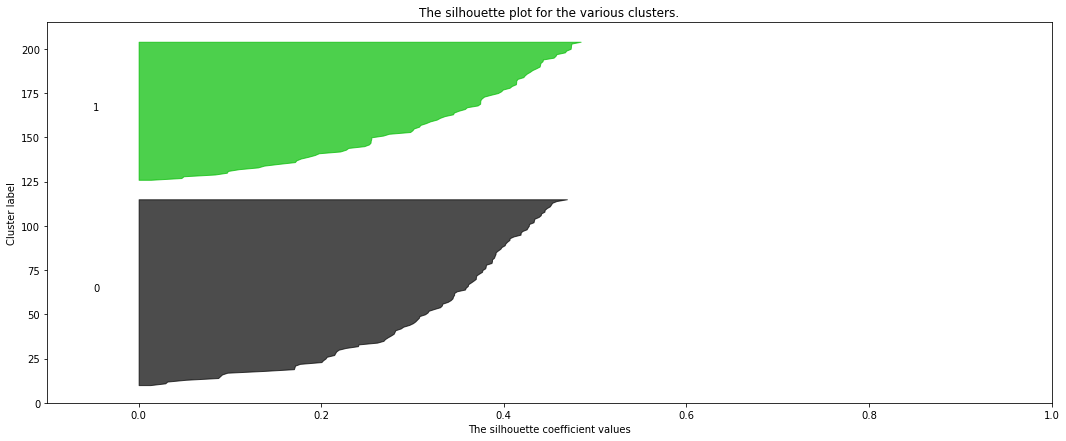

In [192]:
create_silhouette_plot(X, df_stand['predicted_cluster'])

In [ ]:
k-means

In [193]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df_combo['predicted_cluster'] = hac.fit_predict(X)

In [194]:
silhouette_avg = silhouette_score(X, df_combo['predicted_cluster'])
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.30124348638682524


In [195]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

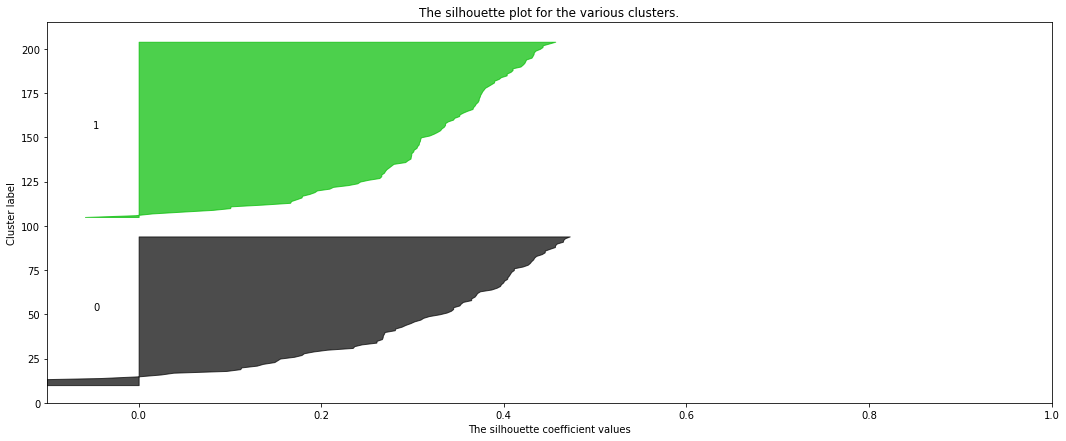

In [196]:
create_silhouette_plot(X, df_combo['predicted_cluster'])

k-means have higher silhouette score, thus have better performance.Also, k-means is less complexity and faster. But, although the cluster analysis of Hierarchical Clustering is not as accurate and efficient as k-means, it can provide more clustering information and provide systematic generalization.

#### 9.1.2. Comparing Algorithm Results

k-means provides more effective clustering results, whereas HAC provides more locally effective data, which helps to extract more information.

### 9.2. Conclusion and Insights Summary

It can be seen that cities in Cluster 0 do better on Avg Rent, but bad at Cappuccino, Cinema, Avg Disposable income, Movehub Rating, Purchase Power, Health Care, Pollution, Quality of Life, Crime Rating. In addition, the two clusters all have similar performance in Wine and Gasoline. In addition, according to the result of the Silhouette plot, k-means algorithm is the one that has better performance.

Based on that understanding, future researchers can remove variables Wine and Gasoline which are considered to be not statistical significance. Also, because k-means is very sensitive to outliers, removing outliers like Hong Kong will significantly improve the performance of the model.

Finally, back to the "factory locations choosing question" that I mentioned in the motivation. After the analysis, I can conclude that Nike and other labor-intensive companies should choose cities in Cluster 0, while knowledge-intensive companies like Tesla and Apple should choose cities in Cluster 1. Relevant decision-makers can view the HAC diagram for more detailed information.

## 10. Group Contribution Report

Jialong Li (solo)

## Reference:
1. Marcus; Hubbard, Phil (2002). Taking world cities literally: Marketing the city in a global space of flows. City, 6(3), 351–368. doi:10.1080/1360481022000037779  
2. Ruth, M., & Franklin, R. S. (2014). Livability for all? Conceptual limits and practical implications. Applied Geography, 49, 18-23.  
3. Von Luxburg, U., Williamson, R. C., & Guyon, I. (2012, June). Clustering: Science or art?. In Proceedings of ICML workshop on unsupervised and transfer learning (pp. 65-79). JMLR Workshop and Conference Proceedings.  
4. Berlin. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Berlin&oldid=1087219787  
5. Bình Dương. (2022). In Wikipedia tiếng Việt. https://vi.wikipedia.org/w/index.php?title=B%C3%ACnh_D%C6%B0%C6%A1ng&oldid=68588155  
6. Texas. (2022). In Wikipedia. https://en.wikipedia.org/w/index.php?title=Texas&oldid=1086916911  
7. Guangxi. (2022). In Wikipedia. https://zh.wikipedia.org/w/index.php?itle=%E5%B9%BF%E8%A5%BF%E5%A3%AE%E6%97%8F%E8%87%AA%E6%B2%BB%E5%8C%BA&oldid=71324221
